time_deltas = pd.to_timedelta(hours, unit='h') + pd.to_timedelta(minutes, unit='m')

# Convert timedelta to datetime
datetime_series = pd.to_datetime(time_deltas)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
deals = pd.read_excel('Deals (Done).xlsx', dtype={'Id': 'Int64', 'Contact Name': 'Int64', 'Initial Amount Paid': 'str', 'Offer Total Amount': 'str'})
deals.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaN,NaN,New Lead,NaN,/eng/test,03.07.23women,NaN,v16,...,NaN,NaN,21.06.2024 15:30,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaN,NaN,New Lead,NaN,/at-eng,NaN,NaN,NaN,...,Web Developer,Morning,21.06.2024 15:23,6.0,NaN,0,2000,5805028000056834471,NaN,NaN
2,5805028000056832357,Ulysses Adams,21.06.2024,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,NaN,NaN,21.06.2024 14:45,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,21.06.2024,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,NaN,NaN,21.06.2024 13:32,NaN,NaN,NaN,NaN,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,21.06.2024,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,NaN,NaN,21.06.2024 13:21,NaN,NaN,NaN,NaN,5805028000056876176,NaN,NaN


In [ ]:
deals.tail()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
21590,5805028000000945016,Jane Smith,29.08.2023,A - High,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,"56 days, 19:01:59",b3,...,NaN,NaN,03.07.2023 20:39,NaN,NaN,NaN,NaN,5805028000000968001,NaN,NaN
21591,5805028000000927004,Bob Brown,09.07.2023,D - Non Target,Lost,Does not speak English,eng/digital-marketing,03.07.23women,NaN,b3,...,NaN,NaN,03.07.2023 20:17,NaN,NaN,NaN,NaN,5805028000000961001,NaN,NaN
21592,5805028000000922001,Bob Brown,03.07.2023,E - Non Qualified,Lost,Refugee,/,NaN,"4 days, 22:47:14",NaN,...,NaN,NaN,03.07.2023 17:03,NaN,NaN,0,0,5805028000001009140,NaN,NaN
21593,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
21594,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN


In [ ]:
filtered_rows = deals[deals['Id'].isnull()]
filtered_rows

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
21593,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
21594,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN


In [ ]:
deals.dropna(subset=['Id'], inplace=True)

In [ ]:
deals.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
21588,False
21589,False
21590,False
21591,False


In [ ]:
num_duplicates = deals.duplicated().sum()
num_duplicates


0

In [ ]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21593 entries, 0 to 21592
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   21593 non-null  Int64  
 1   Deal Owner Name      21564 non-null  object 
 2   Closing Date         14645 non-null  object 
 3   Quality              19340 non-null  object 
 4   Stage                21593 non-null  object 
 5   Lost Reason          16124 non-null  object 
 6   Page                 21593 non-null  object 
 7   Campaign             16067 non-null  object 
 8   SLA                  15533 non-null  object 
 9   Content              14147 non-null  object 
 10  Term                 12454 non-null  object 
 11  Source               21593 non-null  object 
 12  Payment Type         496 non-null    object 
 13  Product              3592 non-null   object 
 14  Education Type       3299 non-null   object 
 15  Created Time         21593 non-null  obje

In [ ]:
(deals.isnull().sum()/(len(deals)))*100  #% пропущенных значений

,0
Id,0.000000
Deal Owner Name,0.134303
Closing Date,32.177094
Quality,10.433937
Stage,0.000000
Lost Reason,25.327652
Page,0.000000
Campaign,25.591627
SLA,28.064651
Content,34.483397


# ***CONTACT NAME***
есть совпадения по имени контакта. Пустые 2 значения заполнила нулями

In [ ]:
deals['Contact Name'] = deals['Contact Name'].fillna(0)
deals['Contact Name']

,Contact Name
0,5805028000056849495
1,5805028000056834471
2,5805028000056854421
3,5805028000056889351
4,5805028000056876176
...,...
21588,5805028000000979006
21589,5805028000000979006
21590,5805028000000968001
21591,5805028000000961001


In [ ]:
deals['Contact Name'].duplicated() # контактных лиц по сделке много совпадений -

,Contact Name
0,False
1,False
2,False
3,False
4,False
...,...
21588,True
21589,True
21590,False
21591,True


In [ ]:
duplicates_count = deals['Id'].duplicated().sum()
print(f'Количество дубликатов: {duplicates_count}')

Количество дубликатов: 0


In [ ]:
deals['Id']

,Id
0,5805028000056864695
1,5805028000056859489
2,5805028000056832357
3,5805028000056824246
4,5805028000056873292
...,...
21588,5805028000000970006
21589,5805028000000948010
21590,5805028000000945016
21591,5805028000000927004


In [ ]:
deals['Id'].unique()

<IntegerArray>
[5805028000056864695, 5805028000056859489, 5805028000056832357,
 5805028000056824246, 5805028000056873292, 5805028000056828429,
 5805028000056893379, 5805028000056849262, 5805028000056845137,
 5805028000056864442,
 ...
 5805028000000931068, 5805028000000963032, 5805028000000935081,
 5805028000000947046, 5805028000000935025, 5805028000000970006,
 5805028000000948010, 5805028000000945016, 5805028000000927004,
 5805028000000922001]
Length: 21593, dtype: Int64

# **Created Time - нет выбросов, время преобразовала в формат день, месяц год**

In [ ]:
deals['Created Time'] = pd.to_datetime(deals['Created Time'].str.split().str[0], format='%d.%m.%Y')
deals['Created Time'] #перевела столбец в дата тип и убрала сремя

,Created Time
0,2024-06-21
1,2024-06-21
2,2024-06-21
3,2024-06-21
4,2024-06-21
...,...
21588,2023-07-04
21589,2023-07-04
21590,2023-07-03
21591,2023-07-03


In [ ]:
deals['Created Time'].describe() #нет выбросов

,Created Time
count,21593
mean,2024-01-26 11:12:49.082573056
min,2023-07-03 00:00:00
25%,2023-11-18 00:00:00
50%,2024-02-05 00:00:00
75%,2024-04-13 00:00:00
max,2024-06-21 00:00:00


In [ ]:
deals.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
21588,False
21589,False
21590,False
21591,False


In [ ]:
duplicates = deals.duplicated(keep=False)
only_duplicates = deals[duplicates]
print(only_duplicates) #вывела только дубликаты

Empty DataFrame
Columns: [Id, Deal Owner Name, Closing Date, Quality, Stage, Lost Reason, Page, Campaign, SLA, Content, Term, Source, Payment Type, Product, Education Type, Created Time, Course duration, Months of study, Initial Amount Paid, Offer Total Amount, Contact Name, City, Level of Deutsch]
Index: []

[0 rows x 23 columns]


In [ ]:
deals.drop_duplicates(subset=['Id'], keep='first', inplace=True)

In [ ]:
duplicates = deals.duplicated(keep=False)
only_duplicates = deals[duplicates]
print(only_duplicates)

Empty DataFrame
Columns: [Id, Deal Owner Name, Closing Date, Quality, Stage, Lost Reason, Page, Campaign, SLA, Content, Term, Source, Payment Type, Product, Education Type, Created Time, Course duration, Months of study, Initial Amount Paid, Offer Total Amount, Contact Name, City, Level of Deutsch]
Index: []

[0 rows x 23 columns]


# ***SLA - перевела в числовой формат. Рассматриваю как время от получения лида до созвона с ним***

In [ ]:
deals['SLA'] = deals['SLA'].astype(str)

In [ ]:
deals['SLA'].unique()

array(['nan', '00:26:43', '01:00:04', ..., '71 days, 0:46:22',
       '56 days, 19:01:59', '4 days, 22:47:14'], dtype=object)

In [ ]:
deals['SLA'] = deals['SLA'].replace({"null": np.nan})
deals['SLA'] = pd.to_timedelta(deals['SLA'])
deals['SLA']

,SLA
0,NaT
1,NaT
2,0 days 00:26:43
3,0 days 01:00:04
4,0 days 00:53:12
...,...
21588,NaT
21589,NaT
21590,56 days 19:01:59
21591,NaT


In [ ]:
len(deals['SLA'])

21593

In [ ]:
# deals['SLA'].median()
# deals['SLA'] = deals['SLA'].fillna(deals['SLA'].median())

In [ ]:
deals.describe()

,Id,SLA,Created Time,Course duration,Months of study,Contact Name
count,21593.0,15533,21593,3587.000000,840.000000,21593.0
mean,5805028000030050304.0,1 days 08:10:26.223330972,2024-01-26 11:12:49.082573056,10.198495,5.442857,5788628856416687104.0
min,5805028000000921600.0,0 days 00:00:03,2023-07-03 00:00:00,6.000000,0.000000,0.0
25%,5805028000017641472.0,0 days 01:13:00,2023-11-18 00:00:00,11.000000,3.000000,5805028000014496768.0
50%,5805028000030102528.0,0 days 05:31:34,2024-02-05 00:00:00,11.000000,5.000000,5805028000027871232.0
75%,5805028000043748352.0,0 days 15:38:38,2024-04-13 00:00:00,11.000000,8.000000,5805028000042081280.0
max,5805028000056893440.0,311 days 10:34:24,2024-06-21 00:00:00,11.000000,11.000000,5805028000056892416.0
std,15695698.318513,8 days 12:47:32.635614064,NaN,1.834681,2.919920,308111915379051776.0


In [ ]:
len(deals)

21593

In [ ]:
deals['SLA'] = deals['SLA'].dt.total_seconds() / 3600

In [ ]:
print(deals['SLA'].describe())

count    15533.000000
mean        32.173951
std        204.792399
min          0.000833
25%          1.216667
50%          5.526111
75%         15.643889
max       7474.573333
Name: SLA, dtype: float64


In [ ]:
deals['SLA']

,SLA
0,NaN
1,NaN
2,0.445278
3,1.001111
4,0.886667
...,...
21588,NaN
21589,NaN
21590,1363.033056
21591,NaN


# **Выявляем выбросы**

In [ ]:
Q1 = deals['SLA'].quantile(0.25)
Q3 = deals['SLA'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_deals = deals[(deals['SLA'] >= lower_bound) & (deals['SLA'] <= upper_bound)]
print(filtered_deals['SLA'].describe())

count    14121.000000
mean         7.638147
std          7.710334
min          0.000833
25%          1.037778
50%          4.279722
75%         13.695278
max         37.274167
Name: SLA, dtype: float64


In [ ]:
deals['SLA'] = deals['SLA'].fillna(deals['SLA'].median())

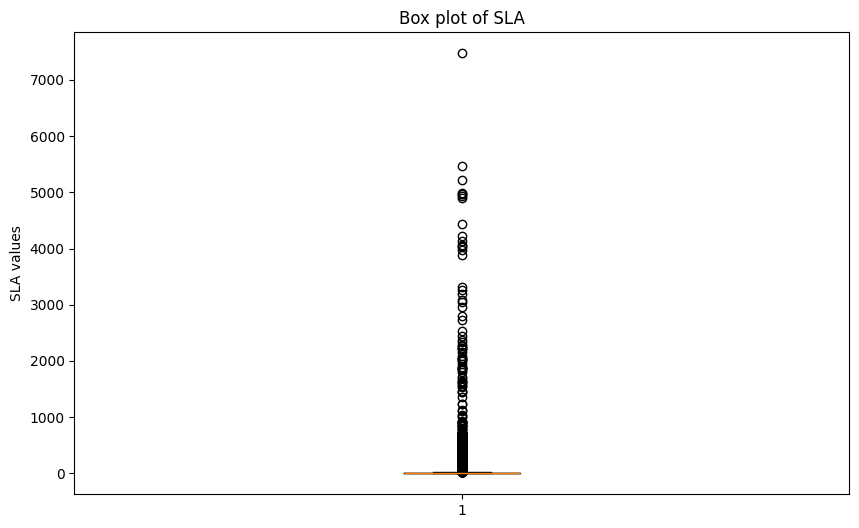

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(deals['SLA'])
plt.title('Box plot of SLA')
plt.ylabel('SLA values')
plt.show()

In [ ]:
len(deals)

21593

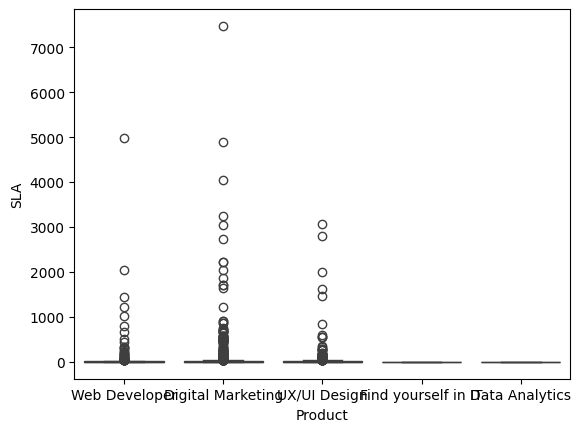

In [ ]:
sns.boxplot(x='Product', y='SLA', data=deals)
plt.show()

# **  **QUALITY - убрала буквы.** Заполнила пустые NO - не определенное качество. Разделила по дефису строку, удалила старый и ненужный столбец с буквой. Столбцец с категорией F - преобразовала и назвала SPECIAL**

---



In [ ]:
deals['Quality'] = deals['Quality'].replace('F', 'F - Special')
deals['Quality'] = deals['Quality'].fillna('No')
deals['Quality'] = deals['Quality'].astype(str)
len(deals)

21593

In [ ]:
deals['Quality'].unique()

array(['No', 'D - Non Target', 'E - Non Qualified', 'B - Medium',
       'C - Low', 'A - High', 'F - Special'], dtype=object)

In [ ]:
# Преобразование необработанных данных - разделение столбца качество на букву и прилегающие слова
deals['Quality1'] = deals['Quality'].str.split(r'\s*-\s*').str[0].str.strip()

len(deals)

21593

In [ ]:
deals['Quality2'] = deals['Quality'].str.split(r'\s*-\s*').str[1].fillna('No').str.strip()
deals.drop('Quality', axis=1, inplace=True)
len(deals)
deals.drop('Quality1', axis=1, inplace=True)
deals.head()

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
0,5805028000056864695,Ben Hall,NaN,New Lead,NaN,/eng/test,03.07.23women,5.526111,v16,women,...,NaN,2024-06-21,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN,No
1,5805028000056859489,Ulysses Adams,NaN,New Lead,NaN,/at-eng,NaN,5.526111,NaN,NaN,...,Morning,2024-06-21,6.0,NaN,0,2000,5805028000056834471,NaN,NaN,No
2,5805028000056832357,Ulysses Adams,21.06.2024,Lost,Non target,/at-eng,engwien_AT,0.445278,b1-at,21_06_2024,...,NaN,2024-06-21,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN,Non Target
3,5805028000056824246,Eva Kent,21.06.2024,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,1.001111,bloggersvideo14com,recentlymoved,...,NaN,2024-06-21,NaN,NaN,NaN,NaN,5805028000056889351,NaN,NaN,Non Qualified
4,5805028000056873292,Ben Hall,21.06.2024,Lost,Non target,/eng,discovery_DE,0.886667,website,NaN,...,NaN,2024-06-21,NaN,NaN,NaN,NaN,5805028000056876176,NaN,NaN,Non Target


In [ ]:
deals['Quality2'].unique()

array(['No', 'Non Target', 'Non Qualified', 'Medium', 'Low', 'High',
       'Special'], dtype=object)

In [ ]:
deals['Quality2'].isna().sum()

0

In [ ]:
deals['Quality2']

,Quality2
0,No
1,No
2,Non Target
3,Non Qualified
4,Non Target
...,...
21588,Non Qualified
21589,Medium
21590,High
21591,Non Target


In [ ]:
deals['Stage'].unique()

array(['New Lead', 'Lost', 'Need a consultation', 'Need To Call',
       'Call Delayed', 'Qualificated', 'Registered on Webinar',
       'Waiting For Payment', 'Need to Call - Sales', 'Test Sent',
       'Payment Done', 'Registered on Offline Day', 'Free Education'],
      dtype=object)

**Удалила пустую строку**

In [ ]:
missing_stage_rows = deals[deals['Stage'].isna()]
missing_stage_rows
del missing_stage_rows

# **Отфильтровала сделки по двум условиям**

In [ ]:
filtered_deals = deals[(deals['Stage'] == 'Lost') & (deals['Lost Reason'].isnull())]
filtered_deals

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
880,5805028000054511070,Paula Underwood,NaN,Lost,NaN,/eng/ux-ui,NaN,4.125000,NaN,NaN,...,Morning,2024-06-11,6.0,NaN,1000,6500,5805028000054511038,Halle,а2,Low
1157,5805028000054144036,Eva Kent,NaN,Lost,NaN,/eng,20.05.24interests_DE,43.356389,v15,interest_work,...,Morning,2024-06-08,11.0,NaN,1000,11000,5805028000054136018,München,b1,Medium
1419,5805028000053380377,Nina Scott,NaN,Lost,NaN,/eng,performancemax_eng_DE,0.461111,_{region_name}_,NaN,...,Morning,2024-06-04,11.0,NaN,1000,11000,5805028000053378480,Villingen‑Schwenningen,В1,Low
1603,5805028000052968776,Cara Iverson,NaN,Lost,NaN,/eng/test,performancemax_eng_DE,18.610000,_{region_name}_,NaN,...,Morning,2024-06-01,6.0,NaN,1000,9000,5805028000052976749,Waldbronn,в1,Low
1812,5805028000052672094,Eva Kent,NaN,Lost,NaN,/eng,youtube_shorts_DE,0.686389,video1com_new,Com_august,...,Morning,2024-05-30,6.0,NaN,1000,9000,5805028000052658133,Lünen,b1,Medium
2012,5805028000052008080,Paula Underwood,NaN,Lost,NaN,/eng,12.07.2023wide_DE,3.074167,bloggersvideo11,wide,...,Morning,2024-05-27,11.0,NaN,1000,11000,5805028000051867964,Duisburg,б1,Low
2219,5805028000051094965,Ulysses Adams,NaN,Lost,NaN,eng/web-developer,NaN,41.530278,NaN,NaN,...,Morning,2024-05-22,11.0,NaN,1000,11000,5805028000051234243,-,А2-В1,Medium
2324,5805028000050859250,Cara Iverson,NaN,Lost,NaN,/eng/test,24.09.23retargeting_DE,2.795556,v15,retargeting,...,Morning,2024-05-20,11.0,NaN,11500,11000,5805028000050802254,Buxtehude,в1,Low
2596,5805028000050007318,Ben Hall,NaN,Lost,NaN,/eng,07.07.23LAL_DE,14.464444,bloggersvideo8com,LAL1,...,Morning,2024-05-14,11.0,NaN,1000,11000,5805028000050001275,Nürnberg,B1,Medium
3101,5805028000048563158,Julia Nelson,NaN,Lost,NaN,/eng/test,NaN,119.969167,NaN,NaN,...,Morning,2024-05-07,11.0,NaN,1000,11000,5805028000048563138,Hannover,b1,Medium


# **ЗАМЕНИЛА ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ В СТОЛБЦЕ LOST REASON ЗНАЧЕНИЕМ "NO REASONS" **

In [ ]:
deals['Lost Reason'] = deals['Lost Reason'].fillna('No reason')
deals['Lost Reason']

,Lost Reason
0,No reason
1,No reason
2,Non target
3,Invalid number
4,Non target
...,...
21588,Duplicate
21589,needs time to think
21590,Changed Decision
21591,Does not speak English


In [ ]:
deals['Lost Reason'].isna().sum()

0

In [ ]:
deals['Stage'].isna().sum()

0

In [ ]:
deals['Campaign'] = deals['Campaign'].fillna('No campaign')


In [ ]:
deals['Campaign'].unique()

array(['03.07.23women', 'No campaign', 'engwien_AT',
       '04.07.23recentlymoved_DE', 'discovery_DE', 'youtube_shorts_DE',
       'brand_search_eng_DE', '1406start', '20.05.24interests_DE',
       'performancemax_eng_DE', '12.07.2023wide_DE', '1006start',
       '24.09.23retargeting_DE', 'germany_DE', 'performancemax_wide_AT',
       '07.07.23LAL_DE', 'webinar1906', 'germania_DE', '02.07.23wide_DE',
       '22.05.2024wide_DE', 'blog_DE', 'blog2_DE', '17.03.24wide_AT',
       '12.06.24wide_DE', 'Jobs_germany_DE', '2005_Lost_DE', 'uk_DE',
       '08.04.24wide_webinar_DE', '08.06.24wide_webinar_DE', 'Akademia',
       'BloggerIvan', 'Genie_DE', 'Live_DE', '1706_DE',
       'performancemax_digitalmarkt_ru_DE', '12.09.23interests_Uxui_DE',
       '5555_DE', 'ASA_de_DE', '2905start', 'webinar1604',
       'bloggerfrai_DE', 'bloggerdr_DE', 'Trigger_DE', 'Bloggerel_DE',
       'Forum_DE', 'Consult_DE', 'work_DE', 'Bolgspeak_DE', 'tyk_DE',
       'of_DE', 'Berlin_DE', 'Markt_DE', 'BloggerShin

In [ ]:
deals['Content'] = deals['Content'].fillna('Unknown')
deals['Term'] = deals['Term'].fillna('Unknown')
deals['Source'] = deals['Source'].fillna('Unknown')

In [ ]:
deals['Payment Type'] = deals['Payment Type'].fillna('No info')
deals['Source'] = deals['Source'].fillna('Unknown')
deals['Education Type'] = deals['Education Type'].fillna('No info')
deals['Months of study'] = deals['Months of study'].fillna(0)

In [ ]:
(deals.isnull().sum()/(len(deals)))*100

,0
Id,0.000000
Deal Owner Name,0.134303
Closing Date,32.177094
Stage,0.000000
Lost Reason,0.000000
Page,0.000000
Campaign,0.000000
SLA,0.000000
Content,0.000000
Term,0.000000


In [ ]:
deals['Closing Date'] = pd.to_datetime(deals['Closing Date'].str.split().str[0], format='%d.%m.%Y')
deals['Closing Date']



,Closing Date
0,NaT
1,NaT
2,2024-06-21
3,2024-06-21
4,2024-06-21
...,...
21588,2023-07-04
21589,2023-08-29
21590,2023-08-29
21591,2023-07-09


# **Closing Date с пустыми значениями заполнила несуществующей датой: 01.01.2025 **

In [ ]:
deals['Closing Date'] = deals['Closing Date'].fillna('01.01.2025')
deals['Closing Date']

,Closing Date
0,2025-01-01
1,2025-01-01
2,2024-06-21
3,2024-06-21
4,2024-06-21
...,...
21588,2023-07-04
21589,2023-08-29
21590,2023-08-29
21591,2023-07-09


In [ ]:
deals['Closing Date'].describe()

,Closing Date
count,21593
mean,2024-05-15 20:55:44.417171968
min,2022-10-11 00:00:00
25%,2023-12-24 00:00:00
50%,2024-04-13 00:00:00
75%,2025-01-01 00:00:00
max,2025-01-01 00:00:00


# **COURSE Duration and Products**

In [ ]:
deals['Product'].unique()

array([nan, 'Web Developer', 'Digital Marketing', 'UX/UI Design',
       'Find yourself in IT', 'Data Analytics'], dtype=object)

In [ ]:
product_counts = deals['Product'].value_counts()
product_counts

,count
Product,
Digital Marketing,1990
UX/UI Design,1022
Web Developer,575
Find yourself in IT,4
Data Analytics,1


In [ ]:
deals.loc[(deals['Product'] == 'Web developer') & (deals['Course duration'] == 0), 'Course duration'] = 6
deals.loc[(deals['Product'] == 'UX/UI') & (deals['Course duration'] == 0), 'Course duration'] = 11
deals.loc[(deals['Product'] == 'Digital Marketing') & (deals['Course duration'] == 0), 'Course duration'] = 10

deals['Course duration']

,Course duration
0,NaN
1,6.0
2,NaN
3,NaN
4,NaN
...,...
21588,NaN
21589,NaN
21590,NaN
21591,NaN


In [ ]:
deals['Course duration'] = deals['Course duration'].fillna(0)
deals['City'] = deals['City'].fillna('Unknown')
deals['City'] = deals['City'].replace('-', 'Unknown')

In [ ]:
deals['Contact Name'] = deals['Contact Name'].fillna(0)
deals['Contact Name']

,Contact Name
0,5805028000056849495
1,5805028000056834471
2,5805028000056854421
3,5805028000056889351
4,5805028000056876176
...,...
21588,5805028000000979006
21589,5805028000000979006
21590,5805028000000968001
21591,5805028000000961001


In [ ]:
deals['Deal Owner Name'] = deals['Deal Owner Name'].fillna('Unspeicified')

In [ ]:
deals['Product'] = deals['Product'].fillna('Not chosen')
deals['Course duration'] = deals['Course duration'].fillna(0)

## **Очистка и заполнение уровня немецого: Сначала все в верхний регистр, Удаляем все символы, кроме A1|A2|B1|Б1|Б2|B2|C1|C2, славянские Б приводим к латинским.


In [ ]:
deals['Level of Deutsch'] = deals['Level of Deutsch'].str.upper()


In [ ]:
pattern = r"^(A1|A2|B1|Б1|Б2|B2|C1|C2)$"
deals['Level of Deutsch'] = deals['Level of Deutsch'].str.extract(pattern, expand=False)

In [ ]:
deals['Level of Deutsch'].unique()

array([nan, 'A2', 'Б1', 'B1', 'B2', 'C2', 'Б2', 'A1', 'C1'], dtype=object)

In [ ]:
replace_levels = {'Б1': 'B1', 'Б2': 'B2'}
deals['Level of Deutsch'] = deals['Level of Deutsch'].replace(replace_levels)
deals['Level of Deutsch'].unique()


array([nan, 'A2', 'B1', 'B2', 'C2', 'A1', 'C1'], dtype=object)

In [ ]:
deals['Level of Deutsch'] = deals['Level of Deutsch'].fillna('Unknown')
deals['Level of Deutsch'].unique()

array(['Unknown', 'A2', 'B1', 'B2', 'C2', 'A1', 'C1'], dtype=object)

In [ ]:
deals['Level of Deutsch']

,Level of Deutsch
0,Unknown
1,Unknown
2,Unknown
3,Unknown
4,Unknown
...,...
21588,Unknown
21589,Unknown
21590,Unknown
21591,Unknown


In [ ]:
valid_levels = ['A1', 'B1', 'C1', 'A2', 'B2', 'C2']
filtered_deals = deals[deals['Level of Deutsch'].isin(valid_levels)]
filtered_deals

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
71,5805028000056564131,Ben Hall,2025-01-01,Waiting For Payment,No reason,/eng,20.05.24interests_DE,12.860833,bloggersvideo14com,interest_work,...,Morning,2024-06-19,11.0,0.0,1000,11000,5805028000056575100,München,A2,Non Target
113,5805028000056162903,Paula Underwood,2025-01-01,Waiting For Payment,No reason,/direct,Jobs_germany_DE,2.028611,Unknown,10_04_2024,...,Morning,2024-06-19,11.0,0.0,1000,11000,5805028000056370054,Eberbach,B1,Medium
137,5805028000056242502,Eva Kent,2025-01-01,Waiting For Payment,No reason,/eng/test,brand_search_eng_DE,5.526111,152789402780_{region_name}_668024583824,it%20career%20hub,...,Morning,2024-06-18,11.0,0.0,1000,11000,5805028000056242477,"Karl-Liebknecht str. 24, Hildburghausen, Thüri...",B1,Non Target
270,5805028000055972602,Ben Hall,2025-01-01,Waiting For Payment,No reason,/webinar,webinar1906,65.580278,Unknown,invitation,...,Morning,2024-06-17,6.0,0.0,1000,9000,5805028000011421467,Unknown,B1,Medium
393,5805028000055613440,Quincy Vincent,2025-01-01,Waiting For Payment,No reason,eng/digital-marketing,07.07.23LAL_DE,12.747500,bloggersvideo9com,LAL1,...,Morning,2024-06-16,11.0,0.0,1000,11000,5805028000055640159,Herzogenrath,B2,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20758,5805028000003918465,Oliver Taylor,2025-01-01,Lost,No reason,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,1.608611,_{region_name}_,Unknown,...,No info,2023-08-07,11.0,0.0,1000,11500,5805028000003971574,Unknown,B1,Medium
20942,5805028000003461836,Jane Smith,2023-11-15,Payment Done,No reason,eng/digital-marketing,03.07.23women,0.152778,b3,women,...,Morning,2023-07-31,11.0,11.0,1000,11500,5805028000003456878,Düsseldorf,B2,Medium
21170,5805028000002926478,Julia Nelson,2023-10-16,Lost,Next stream,eng/digital-marketing,work_DE,0.447500,b3com,19_07_2023,...,Morning,2023-07-24,11.0,0.0,1000,11000,5805028000002895508,Hamburg,B1,Low
21314,5805028000002302112,Julia Nelson,2023-07-19,Payment Done,Expensive,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,15.414444,_{region_name}_,Unknown,...,Morning,2023-07-18,6.0,2.0,1000,5000,5805028000002302109,Wolfsburg,B1,Low


# **Эти ужасные денежные столбцы!!!** Initial Amount я только убрала значок евро, предположив, что все в одной валюте.

In [ ]:
deals['Initial Amount Paid'].unique()

array([nan, '0', '1000', '€ 3.500,00', '500', '100', '4500', '300', '200',
       '2000', '11000', '4000', '3000', '3500', '11500', '1200', '1500',
       '1', '5000', '600', '700', '350', '9', '400', '450'], dtype=object)

In [ ]:
deals['Initial Amount Paid'] = np.where(deals['Initial Amount Paid'] == '€ 3.500,00', 3500, deals['Initial Amount Paid'])
deals['Initial Amount Paid'] = deals['Initial Amount Paid'].fillna('0').astype(str)
deals['Initial Amount Paid'] = deals['Initial Amount Paid'].str.replace(r'[^\d]', '', regex=True) #пытаюсь убрать все-все личшнее с 10й попытки, в данном случае все символы кроме цифр

In [ ]:
deals['Initial Amount Paid'] = pd.to_numeric(deals['Initial Amount Paid'], errors='coerce')

In [ ]:
deals['Initial Amount Paid'].unique()

array([    0,  1000,  3500,   500,   100,  4500,   300,   200,  2000,
       11000,  4000,  3000, 11500,  1200,  1500,     1,  5000,   600,
         700,   350,     9,   400,   450])

In [ ]:
deals['Offer Total Amount'].unique()

array([nan, '2000', '9000', '11000', '3500', '4500', '€ 2.900,00', '6500',
       '4000', '3000', '10000', '2500', '5000', '11500', '1', '1000',
       '1200', '0', '1500', '€ 11398,00', '11111', '6000'], dtype=object)

# **Пересчитала доллары к евро. Привела к одной валюте**

In [ ]:
deals['Offer Total Amount'] = np.where(deals['Offer Total Amount'] == '€ 2.900,00', 2900, deals['Offer Total Amount'])
deals['Offer Total Amount'] = np.where(deals['Offer Total Amount'] == '€ 11398,00', 11398, deals['Offer Total Amount'])
deals['Offer Total Amount'] = deals['Offer Total Amount'].fillna('0').astype(str)
deals['Offer Total Amount'] = deals['Offer Total Amount'].str.replace(r'[^\d]', '', regex=True)

In [ ]:
deals['Offer Total Amount'] = pd.to_numeric(deals['Offer Total Amount'], errors='coerce')


In [ ]:
deals['Offer Total Amount'].unique()

array([    0,  2000,  9000, 11000,  3500,  4500,  2900,  6500,  4000,
        3000, 10000,  2500,  5000, 11500,     1,  1000,  1200,  1500,
       11398, 11111,  6000])

In [ ]:
deals['Offer Total Amount'] = np.where(
    (deals['Offer Total Amount'] > 0) &
    (deals['Offer Total Amount'] != 2900) &
    (deals['Offer Total Amount'] != 11398),
    (deals['Offer Total Amount'] * 1.04).astype(int),
    deals['Offer Total Amount']
)

# **УДАЛИТЬ ЯЧЕЙКИ НИЖЕ????. ВО-ПЕРВЫХ ОДИН И ТОТ ЖЕ КОНТАКТ НЕЙМ (КРОМЕ ОДНОГО ЗНАЧЕНИЯ). вО-ВТОРЫХ, ПОХОЖЕ НА ВЫБРОСЫ = ОШИБКИ**


---





In [ ]:
target = [1, 9]
filtered_deals = deals[deals['Initial Amount Paid'].isin(target)]
filtered_deals

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
3176,5805028000048377930,Quincy Vincent,2024-05-07,Lost,Duplicate,/,No campaign,5.526111,Unknown,Unknown,...,No info,2024-05-06,0.0,0.0,1,0,5805028000048410337,Unknown,Unknown,Non Target
6095,5805028000042448604,Julia Nelson,2024-05-11,Payment Done,Expensive,/page,No campaign,5.526111,Unknown,Unknown,...,No info,2024-04-08,0.0,0.0,1,1,5805028000005448163,Unknown,Unknown,Non Target
10227,5805028000031509082,Julia Nelson,2024-02-12,Lost,Duplicate,/eng,BloggerShina_DE,5.526111,Unknown,25_01_2024,...,No info,2024-02-12,0.0,0.0,1,1,5805028000005448163,Unknown,Unknown,Low
13341,5805028000023894658,Julia Nelson,2024-01-19,Lost,Non target,/eng,No campaign,5.526111,Unknown,Unknown,...,Evening,2024-01-02,11.0,0.0,9,0,5805028000005448163,Unknown,Unknown,Non Target


In [ ]:
target2 = [1]
filtered_deals2 = deals[deals['Offer Total Amount'].isin(target)]
filtered_deals2

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
6095,5805028000042448604,Julia Nelson,2024-05-11,Payment Done,Expensive,/page,No campaign,5.526111,Unknown,Unknown,...,No info,2024-04-08,0.0,0.0,1,1,5805028000005448163,Unknown,Unknown,Non Target
10227,5805028000031509082,Julia Nelson,2024-02-12,Lost,Duplicate,/eng,BloggerShina_DE,5.526111,Unknown,25_01_2024,...,No info,2024-02-12,0.0,0.0,1,1,5805028000005448163,Unknown,Unknown,Low


In [ ]:
index1 = deals[deals['Initial Amount Paid'].isin(target)].index
index2 = deals[deals['Offer Total Amount'].isin(target2)].index
deals = deals.drop(index=index1)


# **CONTACT NAME ДУБЛИКАТЫ?**
отсортировала по оплатам, где сначала проверила Тотал, потом Инишиал на оплату. Если нули, то удалила. Убрала дубликаты: оставляю строку с наибольшим 'Offer Total Amount' для каждого 'Contact Name'

In [ ]:
deals['Contact Name'].duplicated()
duplicates = deals[deals['Contact Name'].duplicated(keep=False)]
duplicates

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
9,5805028000056864442,Victor Barnes,2024-06-21,Lost,Inadequate,/email,1406start,0.168889,Unknown,Unknown,...,No info,2024-06-21,0.0,0.0,0,0,5805028000039274091,Unknown,Unknown,Non Target
14,5805028000056828180,Paula Underwood,2025-01-01,Call Delayed,No reason,/direct,No campaign,0.990278,Unknown,Unknown,...,No info,2024-06-21,0.0,0.0,0,0,5805028000056685457,Unknown,Unknown,Non Target
19,5805028000056854090,Amy Green,2024-06-21,Lost,Invalid number,/email,1006start,5.526111,Unknown,Unknown,...,No info,2024-06-21,0.0,0.0,0,0,5805028000013202024,Unknown,Unknown,Non Qualified
20,5805028000056892092,Ulysses Adams,2025-01-01,Need a consultation,No reason,/,No campaign,1.065833,Unknown,Unknown,...,No info,2024-06-21,0.0,0.0,0,0,5805028000053247795,Unknown,Unknown,No
33,5805028000056694634,Eva Kent,2025-01-01,Registered on Webinar,No reason,/webinar,No campaign,5.526111,Unknown,Unknown,...,No info,2024-06-20,0.0,0.0,0,0,5805028000054756081,Unknown,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21585,5805028000000935081,Julia Nelson,2025-01-01,Call Delayed,No reason,eng/digital-marketing,03.07.23women,1703.214722,b3,women,...,Morning,2023-07-04,11.0,0.0,1000,11960,5805028000000971007,Unknown,Unknown,Non Target
21586,5805028000000947046,Oliver Taylor,2025-01-01,Payment Done,No reason,eng/digital-marketing,02.07.23wide_DE,1704.772778,b3,wide,...,Morning,2023-07-04,11.0,11.0,1000,11440,5805028000000939010,Unknown,Unknown,Medium
21588,5805028000000970006,Jane Smith,2023-07-04,Lost,Duplicate,eng/digital-marketing,03.07.23women,5.526111,b3,women,...,No info,2023-07-04,0.0,0.0,0,0,5805028000000979006,Unknown,Unknown,Non Qualified
21589,5805028000000948010,Jane Smith,2023-08-29,Lost,needs time to think,eng/digital-marketing,03.07.23women,5.526111,b3,women,...,No info,2023-07-04,0.0,0.0,0,0,5805028000000979006,Unknown,Unknown,Medium


In [ ]:
deals_sorted = deals.sort_values(
    by=['Offer Total Amount', 'Initial Amount Paid'],
    ascending=[False, False]
)
deals_cleaned = deals_sorted.drop_duplicates(subset='Contact Name', keep='first')
deals_cleaned = deals_cleaned.reset_index(drop=True)
deals_cleaned

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
0,5805028000007843060,Ulysses Adams,2025-01-01,Lost,Stopped Answering,eng/digital-marketing,04.07.23recentlymoved_DE,0.016667,b6,recentlymoved,...,Morning,2023-09-15,11.0,0.0,1500,11960,5805028000007854069,Unknown,Unknown,Medium
1,5805028000007754120,Cara Iverson,2023-11-12,Lost,needs time to think,eng/digital-marketing,work_DE,13.890278,b6,13_09_2023,...,No info,2023-09-14,11.0,0.0,1500,11960,5805028000007742068,Unknown,Unknown,Low
2,5805028000007744074,Jane Smith,2023-10-18,Lost,needs time to think,eng/digital-marketing,work_DE,0.543333,b6,13_09_2023,...,No info,2023-09-14,11.0,0.0,1500,11960,5805028000007761132,Unknown,Unknown,Low
3,5805028000007647107,Jane Smith,2023-09-14,Lost,Doesn't Answer,eng/digital-marketing,youtube_shorts_DE,5.526111,ad_da_1,Com_august,...,No info,2023-09-14,11.0,0.0,1500,11960,5805028000007649089,Unknown,Unknown,Medium
4,5805028000007623014,Jane Smith,2023-09-14,Lost,Thought for free,eng/digital-marketing,youtube_shorts_DE,2.800833,ad_da_1,Com_august,...,No info,2023-09-14,11.0,0.0,1500,11960,5805028000007595085,Unknown,Unknown,Non Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18084,5805028000000933086,Ian Miller,2023-09-21,Lost,Expensive,eng/digital-marketing,02.07.23wide_DE,37.870000,b3,wide,...,No info,2023-07-04,0.0,0.0,0,0,5805028000000964068,Unknown,Unknown,Low
18085,5805028000000963032,Ian Miller,2023-09-25,Lost,Stopped Answering,eng/digital-marketing,02.07.23wide_DE,47.049167,b3,wide,...,No info,2023-07-04,0.0,0.0,0,0,5805028000000942003,Unknown,Unknown,High
18086,5805028000000935025,Kevin Parker,2023-07-06,Lost,Doesn't Answer,eng/digital-marketing,02.07.23wide_DE,5.526111,b3,wide,...,No info,2023-07-04,0.0,0.0,0,0,5805028000000983028,Unknown,Unknown,Non Qualified
18087,5805028000000945016,Jane Smith,2023-08-29,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,1363.033056,b3,wide,...,No info,2023-07-03,0.0,0.0,0,0,5805028000000968001,Unknown,Unknown,High


In [ ]:
deals = deals_cleaned

In [ ]:
deals['Contact Name'].duplicated()
duplicates = deals[deals['Contact Name'].duplicated(keep=False)]
duplicates

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2


## **Убираю все ячейки, ведущие на тестовую страницу, без оплат и без рекламной кампании**

In [ ]:
page_test = deals[(deals['Page'] == '/test')& (deals['Campaign'] == 'No campaign') & (deals['Initial Amount Paid'] == 0)]
page_test

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
4437,5805028000053115473,Paula Underwood,2025-01-01,Call Delayed,No reason,/test,No campaign,4.690278,Unknown,Unknown,...,No info,2024-06-03,0.0,0.0,0,0,5805028000053098914,Unknown,Unknown,Non Target
6444,5805028000046530041,Quincy Vincent,2024-04-28,Lost,Non target,/test,No campaign,0.146944,Unknown,Unknown,...,No info,2024-04-25,0.0,0.0,0,0,5805028000046517043,Unknown,Unknown,Non Qualified
6676,5805028000045439164,Charlie Davis,2025-01-01,Lost,Duplicate,/test,No campaign,5.526111,Unknown,Unknown,...,No info,2024-04-22,0.0,0.0,0,0,5805028000020284809,Unknown,Unknown,Non Qualified
7292,5805028000043896744,Cara Iverson,2024-04-20,Lost,Conditions are not suitable,/test,No campaign,117.857778,Unknown,Unknown,...,No info,2024-04-15,0.0,0.0,0,0,5805028000043890793,Unknown,Unknown,Non Qualified
7357,5805028000043855188,Cara Iverson,2024-06-04,Lost,Changed Decision,/test,No campaign,0.900000,Unknown,Unknown,...,No info,2024-04-15,0.0,0.0,0,0,5805028000043843504,Unknown,Unknown,Low
7961,5805028000042634107,Ulysses Adams,2024-04-09,Lost,Duplicate,/test,No campaign,5.526111,Unknown,Unknown,...,No info,2024-04-09,0.0,0.0,0,0,5805028000003547139,Unknown,Unknown,Non Qualified
8320,5805028000041513086,Paula Underwood,2024-04-20,Lost,Duplicate,/test,No campaign,5.526111,Unknown,Unknown,...,No info,2024-04-03,0.0,0.0,0,0,5805028000040347651,Unknown,Unknown,Non Qualified
10100,5805028000035377366,Paula Underwood,2024-03-14,Lost,Invalid number,/test,No campaign,305.904722,Unknown,Unknown,...,No info,2024-03-01,0.0,0.0,0,0,5805028000035375388,Unknown,Unknown,Non Qualified
10136,5805028000035152289,Ben Hall,2025-01-01,Lost,Doesn't Answer,/test,No campaign,1862.118611,Unknown,Unknown,...,No info,2024-02-29,0.0,0.0,0,0,5805028000035134266,Unknown,Unknown,Non Target
11611,5805028000029426088,Ben Hall,2025-01-01,Lost,Doesn't Answer,/test,No campaign,23.529722,Unknown,Unknown,...,No info,2024-01-31,0.0,0.0,0,0,5805028000029381123,Unknown,Unknown,Non Qualified


In [ ]:
filtered_rows = (deals['Page'] != '/test') | (deals['Campaign'] != 'No campaign') | (deals['Initial Amount Paid'] != 0)
deals = deals[filtered_rows].reset_index(drop=True)
deals

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
0,5805028000007843060,Ulysses Adams,2025-01-01,Lost,Stopped Answering,eng/digital-marketing,04.07.23recentlymoved_DE,0.016667,b6,recentlymoved,...,Morning,2023-09-15,11.0,0.0,1500,11960,5805028000007854069,Unknown,Unknown,Medium
1,5805028000007754120,Cara Iverson,2023-11-12,Lost,needs time to think,eng/digital-marketing,work_DE,13.890278,b6,13_09_2023,...,No info,2023-09-14,11.0,0.0,1500,11960,5805028000007742068,Unknown,Unknown,Low
2,5805028000007744074,Jane Smith,2023-10-18,Lost,needs time to think,eng/digital-marketing,work_DE,0.543333,b6,13_09_2023,...,No info,2023-09-14,11.0,0.0,1500,11960,5805028000007761132,Unknown,Unknown,Low
3,5805028000007647107,Jane Smith,2023-09-14,Lost,Doesn't Answer,eng/digital-marketing,youtube_shorts_DE,5.526111,ad_da_1,Com_august,...,No info,2023-09-14,11.0,0.0,1500,11960,5805028000007649089,Unknown,Unknown,Medium
4,5805028000007623014,Jane Smith,2023-09-14,Lost,Thought for free,eng/digital-marketing,youtube_shorts_DE,2.800833,ad_da_1,Com_august,...,No info,2023-09-14,11.0,0.0,1500,11960,5805028000007595085,Unknown,Unknown,Non Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18065,5805028000000933086,Ian Miller,2023-09-21,Lost,Expensive,eng/digital-marketing,02.07.23wide_DE,37.870000,b3,wide,...,No info,2023-07-04,0.0,0.0,0,0,5805028000000964068,Unknown,Unknown,Low
18066,5805028000000963032,Ian Miller,2023-09-25,Lost,Stopped Answering,eng/digital-marketing,02.07.23wide_DE,47.049167,b3,wide,...,No info,2023-07-04,0.0,0.0,0,0,5805028000000942003,Unknown,Unknown,High
18067,5805028000000935025,Kevin Parker,2023-07-06,Lost,Doesn't Answer,eng/digital-marketing,02.07.23wide_DE,5.526111,b3,wide,...,No info,2023-07-04,0.0,0.0,0,0,5805028000000983028,Unknown,Unknown,Non Qualified
18068,5805028000000945016,Jane Smith,2023-08-29,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,1363.033056,b3,wide,...,No info,2023-07-03,0.0,0.0,0,0,5805028000000968001,Unknown,Unknown,High


In [ ]:
page_test_en = deals[(deals['Page'] == '/eng/test')& (deals['Campaign'] == 'No campaign') & (deals['Initial Amount Paid'] == 0)]
page_test_en

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
3304,5805028000056705395,Ulysses Adams,2024-06-20,Lost,Duplicate,/eng/test,No campaign,5.526111,Unknown,Unknown,...,No info,2024-06-20,0.0,0.0,0,0,5805028000056727001,Unknown,Unknown,Non Qualified
3313,5805028000056685164,Charlie Davis,2024-06-20,Lost,Duplicate,/eng/test,No campaign,5.526111,Unknown,Unknown,...,No info,2024-06-20,0.0,0.0,0,0,5805028000056392363,Unknown,Unknown,Non Qualified
3406,5805028000056175280,Ulysses Adams,2024-06-18,Lost,Duplicate,/eng/test,No campaign,5.526111,Unknown,Unknown,...,No info,2024-06-18,0.0,0.0,0,0,5805028000056175248,Unknown,Unknown,Non Qualified
3434,5805028000055951864,Quincy Vincent,2025-01-01,Qualificated,No reason,/eng/test,No campaign,3.232222,bloggersvideo1june,Com_august,...,No info,2024-06-18,0.0,0.0,0,0,5805028000055946935,Unknown,Unknown,Low
3551,5805028000055700073,Ulysses Adams,2025-01-01,Call Delayed,No reason,/eng/test,No campaign,4.441389,Unknown,Unknown,...,No info,2024-06-17,0.0,0.0,0,0,5805028000055671020,Unknown,Unknown,Non Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16893,5805028000007005008,Diana Evans,2023-09-07,Lost,Duplicate,/eng/test,No campaign,5.526111,Unknown,Unknown,...,No info,2023-09-07,0.0,0.0,0,0,5805028000007037001,Unknown,Unknown,Non Target
16963,5805028000006654084,Diana Evans,2023-09-07,Lost,Doesn't Answer,/eng/test,No campaign,0.986944,Unknown,Unknown,...,No info,2023-09-04,0.0,0.0,0,0,5805028000006655112,Unknown,Unknown,Non Qualified
16965,5805028000006635085,Ulysses Adams,2024-04-10,Lost,Doesn't Answer,/eng/test,No campaign,0.859722,Unknown,Unknown,...,No info,2023-09-04,0.0,0.0,0,0,5805028000006655041,Unknown,Unknown,Low
17068,5805028000005854396,Charlie Davis,2023-08-26,Lost,Duplicate,/eng/test,No campaign,1.693056,Unknown,Unknown,...,No info,2023-08-26,0.0,0.0,0,0,5805028000005831434,Unknown,Unknown,Non Qualified


# **Course duration , который равен 0 и была осуществлена оплата выставляю длительность курса месяц, где Initial Amount Paid = 500 и 1000, где 2000 - меняю на 4 месяца по аналогии с 500**


In [ ]:
zero_duration = deals[(deals['Course duration'] == 0) & (deals['Initial Amount Paid'] > 0)]
zero_duration

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
246,5805028000009352386,Jane Smith,2023-11-05,Lost,needs time to think,/eng/ux-ui,jet_DE,5.526111,b1comwebdev,24_09_2023,...,No info,2023-09-29,0.0,0.0,1000,11960,5805028000009386253,Unknown,Unknown,Low
251,5805028000009204086,Jane Smith,2023-10-18,Lost,Stopped Answering,eng/digital-marketing,12.07.2023wide_DE,0.124722,bloggersvideo4com,wide,...,No info,2023-09-27,0.0,0.0,1000,11960,5805028000009191080,Unknown,Unknown,Low
646,5805028000049169402,Paula Underwood,2024-05-18,Lost,Changed Decision,/account,02.05.24test_DE,7.475000,b3accountant,accountant_wide,...,Morning,2024-05-10,0.0,0.0,1000,11440,5805028000049177353,Unknown,Unknown,Medium
850,5805028000038508597,Nina Scott,2024-03-24,Lost,Doesn't Answer,/email,No campaign,197.971667,Unknown,Unknown,...,Morning,2024-03-20,0.0,0.0,1000,11440,5805028000035782435,Unknown,Unknown,Non Qualified
1122,5805028000028148432,Victor Barnes,2025-01-01,Call Delayed,No reason,/eng/ux-ui,No campaign,15.765278,Unknown,Unknown,...,No info,2024-01-24,0.0,0.0,1000,11440,5805028000022248088,München,Unknown,Non Target
1553,5805028000020322964,Nina Scott,2024-03-20,Lost,Stopped Answering,/eng,12.07.2023wide_DE,11.746944,bloggersvideo9com,wide,...,Morning,2023-12-08,0.0,0.0,1000,11440,5805028000020341915,Unknown,Unknown,Low
2161,5805028000007090048,Ulysses Adams,2023-09-08,Call Delayed,Next stream,eng/digital-marketing,12.07.2023wide_DE,1.528333,v10com,wide,...,Morning,2023-09-08,0.0,0.0,1000,11440,5805028000007107127,Unknown,Unknown,Non Target
2960,5805028000008899005,Ulysses Adams,2024-02-05,Lost,Duplicate,/,No campaign,3.965556,Unknown,Unknown,...,No info,2023-09-25,0.0,0.0,2000,3640,5805028000008876030,Unknown,Unknown,Non Qualified
3096,5805028000004130362,Bob Brown,2025-01-01,Lost,Duplicate,/test,No campaign,5.526111,Unknown,Unknown,...,No info,2023-08-08,0.0,0.0,500,3120,5805028000004115323,Unknown,Unknown,Special


In [ ]:
deals.loc[(deals['Course duration'] == 0) & (deals['Initial Amount Paid'] == 500), 'Course duration'] = 1
deals.loc[(deals['Course duration'] == 0) & (deals['Initial Amount Paid'] == 1000), 'Course duration'] = 1
deals.loc[(deals['Course duration'] == 0) & (deals['Initial Amount Paid'] == 2000), 'Course duration'] = 4


In [ ]:
deals['Course duration'] = deals['Course duration'].astype(int)

# **Где отсутствуют платежи и нет РК - удаляю**

In [ ]:
nopayment_no_compaign = deals[(deals['Campaign'] == 'No campaign') & (deals['Initial Amount Paid'] == 0) & (deals['Offer Total Amount'] == 0)]
nopayment_no_compaign

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
3269,5805028000056893379,Ulysses Adams,2025-01-01,Need To Call,No reason,eng/digital-marketing,No campaign,5.526111,Unknown,Unknown,...,No info,2024-06-21,0,0.0,0,0,5805028000056832215,Unknown,Unknown,No
3271,5805028000056845137,Rachel White,2024-06-21,Lost,Duplicate,/,No campaign,5.526111,Unknown,Unknown,...,No info,2024-06-21,0,0.0,0,0,5805028000056849237,Unknown,Unknown,Non Qualified
3273,5805028000056892253,Ulysses Adams,2024-06-21,Lost,Duplicate,/webinar,No campaign,5.526111,Unknown,Unknown,...,No info,2024-06-21,0,0.0,0,0,5805028000056828292,Unknown,Unknown,Non Qualified
3274,5805028000056893253,Paula Underwood,2025-01-01,New Lead,No reason,/at-eng/digital-marketing,No campaign,5.526111,Unknown,Unknown,...,No info,2024-06-21,0,0.0,0,0,5805028000056833185,Unknown,Unknown,No
3275,5805028000056864343,Ulysses Adams,2025-01-01,Call Delayed,No reason,/eng/ux-ui,No campaign,2.555278,Unknown,Unknown,...,No info,2024-06-21,0,0.0,0,0,5805028000056889209,Unknown,Unknown,Non Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,5805028000001792088,Bob Brown,2025-01-01,Lost,Duplicate,eng/digital-marketing,No campaign,5.526111,Unknown,Unknown,...,No info,2023-07-14,0,0.0,0,0,5805028000001803147,Unknown,Unknown,Non Qualified
17999,5805028000001797093,Bob Brown,2025-01-01,Lost,Duplicate,/,No campaign,5.526111,Unknown,Unknown,...,No info,2023-07-14,0,0.0,0,0,5805028000001805007,Unknown,Unknown,Non Qualified
18013,5805028000001562042,Bob Brown,2023-07-18,Lost,Doesn't Answer,/eng,No campaign,5.526111,Unknown,Unknown,...,No info,2023-07-13,0,0.0,0,0,5805028000001561043,Unknown,Unknown,Non Qualified
18062,5805028000001035024,Ian Miller,2023-09-21,Lost,Stopped Answering,eng/digital-marketing,No campaign,16.301389,Unknown,Unknown,...,No info,2023-07-05,0,0.0,0,0,5805028000001030010,Unknown,Unknown,Low


In [ ]:
filtered_rows_to_delete = (deals['Campaign'] == 'No campaign') & (deals['Initial Amount Paid'] == 0) & (deals['Offer Total Amount'] == 0)
deals_cleaned = deals[~filtered_rows_to_delete].reset_index(drop=True)
deals_cleaned
deals = deals_cleaned



In [ ]:
nopayment_no_compaign2 = deals[(deals['Campaign'] == 'No campaign') & (deals['Initial Amount Paid'] == 0)]
nopayment_no_compaign

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
3269,5805028000056893379,Ulysses Adams,2025-01-01,Need To Call,No reason,eng/digital-marketing,No campaign,5.526111,Unknown,Unknown,...,No info,2024-06-21,0,0.0,0,0,5805028000056832215,Unknown,Unknown,No
3271,5805028000056845137,Rachel White,2024-06-21,Lost,Duplicate,/,No campaign,5.526111,Unknown,Unknown,...,No info,2024-06-21,0,0.0,0,0,5805028000056849237,Unknown,Unknown,Non Qualified
3273,5805028000056892253,Ulysses Adams,2024-06-21,Lost,Duplicate,/webinar,No campaign,5.526111,Unknown,Unknown,...,No info,2024-06-21,0,0.0,0,0,5805028000056828292,Unknown,Unknown,Non Qualified
3274,5805028000056893253,Paula Underwood,2025-01-01,New Lead,No reason,/at-eng/digital-marketing,No campaign,5.526111,Unknown,Unknown,...,No info,2024-06-21,0,0.0,0,0,5805028000056833185,Unknown,Unknown,No
3275,5805028000056864343,Ulysses Adams,2025-01-01,Call Delayed,No reason,/eng/ux-ui,No campaign,2.555278,Unknown,Unknown,...,No info,2024-06-21,0,0.0,0,0,5805028000056889209,Unknown,Unknown,Non Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,5805028000001792088,Bob Brown,2025-01-01,Lost,Duplicate,eng/digital-marketing,No campaign,5.526111,Unknown,Unknown,...,No info,2023-07-14,0,0.0,0,0,5805028000001803147,Unknown,Unknown,Non Qualified
17999,5805028000001797093,Bob Brown,2025-01-01,Lost,Duplicate,/,No campaign,5.526111,Unknown,Unknown,...,No info,2023-07-14,0,0.0,0,0,5805028000001805007,Unknown,Unknown,Non Qualified
18013,5805028000001562042,Bob Brown,2023-07-18,Lost,Doesn't Answer,/eng,No campaign,5.526111,Unknown,Unknown,...,No info,2023-07-13,0,0.0,0,0,5805028000001561043,Unknown,Unknown,Non Qualified
18062,5805028000001035024,Ian Miller,2023-09-21,Lost,Stopped Answering,eng/digital-marketing,No campaign,16.301389,Unknown,Unknown,...,No info,2023-07-05,0,0.0,0,0,5805028000001030010,Unknown,Unknown,Low


In [ ]:
filtered_rows_to_delete = (deals['Campaign'] == 'No campaign') & (deals['Initial Amount Paid'] == 0)
deals_cleaned = deals[~filtered_rows_to_delete].reset_index(drop=True)
deals_cleaned
deals = deals_cleaned
deals

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
0,5805028000007843060,Ulysses Adams,2025-01-01,Lost,Stopped Answering,eng/digital-marketing,04.07.23recentlymoved_DE,0.016667,b6,recentlymoved,...,Morning,2023-09-15,11,0.0,1500,11960,5805028000007854069,Unknown,Unknown,Medium
1,5805028000007754120,Cara Iverson,2023-11-12,Lost,needs time to think,eng/digital-marketing,work_DE,13.890278,b6,13_09_2023,...,No info,2023-09-14,11,0.0,1500,11960,5805028000007742068,Unknown,Unknown,Low
2,5805028000007744074,Jane Smith,2023-10-18,Lost,needs time to think,eng/digital-marketing,work_DE,0.543333,b6,13_09_2023,...,No info,2023-09-14,11,0.0,1500,11960,5805028000007761132,Unknown,Unknown,Low
3,5805028000007647107,Jane Smith,2023-09-14,Lost,Doesn't Answer,eng/digital-marketing,youtube_shorts_DE,5.526111,ad_da_1,Com_august,...,No info,2023-09-14,11,0.0,1500,11960,5805028000007649089,Unknown,Unknown,Medium
4,5805028000007623014,Jane Smith,2023-09-14,Lost,Thought for free,eng/digital-marketing,youtube_shorts_DE,2.800833,ad_da_1,Com_august,...,No info,2023-09-14,11,0.0,1500,11960,5805028000007595085,Unknown,Unknown,Non Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14496,5805028000001037002,Diana Evans,2023-09-07,Lost,Changed Decision,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,23.157778,Unknown,_,...,No info,2023-07-05,0,0.0,0,0,5805028000001023002,Unknown,Unknown,High
14497,5805028000000933086,Ian Miller,2023-09-21,Lost,Expensive,eng/digital-marketing,02.07.23wide_DE,37.870000,b3,wide,...,No info,2023-07-04,0,0.0,0,0,5805028000000964068,Unknown,Unknown,Low
14498,5805028000000963032,Ian Miller,2023-09-25,Lost,Stopped Answering,eng/digital-marketing,02.07.23wide_DE,47.049167,b3,wide,...,No info,2023-07-04,0,0.0,0,0,5805028000000942003,Unknown,Unknown,High
14499,5805028000000935025,Kevin Parker,2023-07-06,Lost,Doesn't Answer,eng/digital-marketing,02.07.23wide_DE,5.526111,b3,wide,...,No info,2023-07-04,0,0.0,0,0,5805028000000983028,Unknown,Unknown,Non Qualified


# **ПРОВЕРЯЮ ПЕРЕПУТАННОЕ ЗАПОЛНЕНИЕ ОПЛАТ**
меняю местами оффер и первую оплату там где оффер не равен 0

In [ ]:
payment_mist = deals[(deals['Offer Total Amount']) < (deals['Initial Amount Paid'])]
payment_mist

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
391,5805028000053561185,Cara Iverson,2024-06-07,Lost,Non target,/eng,Berlin_DE,5.714167,b6,01_02_2024,...,Morning,2024-06-05,11,0.0,11500,11440,5805028000053534166,Zwickau,Unknown,Non Target
392,5805028000053462041,Charlie Davis,2025-01-01,Lost,Gutstein refusal,/eng,performancemax_eng_DE,13.369722,_{region_name}_,Unknown,...,Morning,2024-06-04,11,0.0,11500,11440,5805028000053471005,Aschaffenburg,B2,Non Target
393,5805028000053242748,Cara Iverson,2025-01-01,Waiting For Payment,No reason,/direct,blog2_DE,0.650833,Unknown,30_05_2024,...,Morning,2024-06-04,11,0.0,11500,11440,5805028000053244895,Straubing,Unknown,High
394,5805028000053242571,Quincy Vincent,2024-06-05,Lost,Non target,/eng,Live_DE,0.313889,b0,03_06_2024,...,Morning,2024-06-04,11,0.0,11500,11440,5805028000053279736,Augsburg,Unknown,Non Target
395,5805028000052969001,Cara Iverson,2025-01-01,Waiting For Payment,No reason,/direct,blog2_DE,13.997222,Unknown,30_05_2024,...,Morning,2024-05-31,11,0.0,11500,11440,5805028000052893037,Perleberg,Unknown,Low
396,5805028000051885327,Cara Iverson,2025-01-01,Waiting For Payment,No reason,/eng,22.05.2024wide_DE,2.735833,bloggersvideo18com,wide,...,Morning,2024-05-26,11,0.0,11500,11440,5805028000051865476,Essen,Unknown,High
397,5805028000050859250,Cara Iverson,2025-01-01,Lost,No reason,/eng/test,24.09.23retargeting_DE,2.795556,v15,retargeting,...,Morning,2024-05-20,11,0.0,11500,11440,5805028000050802254,Buxtehude,Unknown,Low
398,5805028000049558326,Cara Iverson,2025-01-01,Payment Done,No reason,/eng/test,07.07.23LAL_DE,3.135278,bloggersvideo8com,LAL1,...,Morning,2024-05-12,11,2.0,11500,11440,5805028000049568134,Unknown,Unknown,Low
399,5805028000048797082,Cara Iverson,2025-01-01,Lost,Changed Decision,/eng/test,brand_search_eng_DE,16.310000,152789402780_{region_name}_695563281558,it hub,...,Morning,2024-05-07,11,0.0,11500,11440,5805028000048797050,Unknown,Unknown,Medium
400,5805028000048353017,Cara Iverson,2025-01-01,Payment Done,No reason,/eng,12.07.2023wide_DE,17.612500,bloggersvideo11,wide,...,Morning,2024-05-05,11,2.0,11500,11440,5805028000048344244,Unknown,Unknown,Medium


In [ ]:
condition = (deals['Offer Total Amount'] < deals['Initial Amount Paid']) & (deals['Offer Total Amount'] != 0)
deals.loc[condition, ['Offer Total Amount', 'Initial Amount Paid']] = deals.loc[condition, ['Initial Amount Paid', 'Offer Total Amount']].values
deals

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
0,5805028000007843060,Ulysses Adams,2025-01-01,Lost,Stopped Answering,eng/digital-marketing,04.07.23recentlymoved_DE,0.016667,b6,recentlymoved,...,Morning,2023-09-15,11,0.0,1500,11960,5805028000007854069,Unknown,Unknown,Medium
1,5805028000007754120,Cara Iverson,2023-11-12,Lost,needs time to think,eng/digital-marketing,work_DE,13.890278,b6,13_09_2023,...,No info,2023-09-14,11,0.0,1500,11960,5805028000007742068,Unknown,Unknown,Low
2,5805028000007744074,Jane Smith,2023-10-18,Lost,needs time to think,eng/digital-marketing,work_DE,0.543333,b6,13_09_2023,...,No info,2023-09-14,11,0.0,1500,11960,5805028000007761132,Unknown,Unknown,Low
3,5805028000007647107,Jane Smith,2023-09-14,Lost,Doesn't Answer,eng/digital-marketing,youtube_shorts_DE,5.526111,ad_da_1,Com_august,...,No info,2023-09-14,11,0.0,1500,11960,5805028000007649089,Unknown,Unknown,Medium
4,5805028000007623014,Jane Smith,2023-09-14,Lost,Thought for free,eng/digital-marketing,youtube_shorts_DE,2.800833,ad_da_1,Com_august,...,No info,2023-09-14,11,0.0,1500,11960,5805028000007595085,Unknown,Unknown,Non Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14496,5805028000001037002,Diana Evans,2023-09-07,Lost,Changed Decision,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,23.157778,Unknown,_,...,No info,2023-07-05,0,0.0,0,0,5805028000001023002,Unknown,Unknown,High
14497,5805028000000933086,Ian Miller,2023-09-21,Lost,Expensive,eng/digital-marketing,02.07.23wide_DE,37.870000,b3,wide,...,No info,2023-07-04,0,0.0,0,0,5805028000000964068,Unknown,Unknown,Low
14498,5805028000000963032,Ian Miller,2023-09-25,Lost,Stopped Answering,eng/digital-marketing,02.07.23wide_DE,47.049167,b3,wide,...,No info,2023-07-04,0,0.0,0,0,5805028000000942003,Unknown,Unknown,High
14499,5805028000000935025,Kevin Parker,2023-07-06,Lost,Doesn't Answer,eng/digital-marketing,02.07.23wide_DE,5.526111,b3,wide,...,No info,2023-07-04,0,0.0,0,0,5805028000000983028,Unknown,Unknown,Non Qualified


In [ ]:
deals.loc[(deals['Course duration'] == 0) & (deals['Initial Amount Paid'] == 500), 'Course duration'] = 6
deals.loc[(deals['Course duration'] == 0) & (deals['Initial Amount Paid'] == 1000), 'Course duration'] = 6
deals.loc[(deals['Course duration'] == 0) & (deals['Initial Amount Paid'] == 2000), 'Course duration'] = 11
deals.loc[(deals['Course duration'] == 1),'Course duration'] = 11

# **CITY. Обнаружила схожие строки** Проверяю сколько таких и удаляю дубли


In [ ]:
duplicate_rows = deals[deals.duplicated(subset=['City', 'Payment Type', 'Term', 'Campaign', 'Stage', 'Content', 'Deal Owner Name', 'Quality2', 'Stage', 'Lost Reason', 'Created Time', 'Closing Date', 'SLA', 'Page', 'Initial Amount Paid', 'Offer Total Amount' ], keep=False)]

duplicate_rows

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
3344,5805028000056174945,Victor Barnes,2025-01-01,Registered on Webinar,No reason,/webinar,webinar1906,5.526111,Unknown,invitation,...,No info,2024-06-18,0,0.0,0,0,5805028000034138002,Unknown,Unknown,No
3345,5805028000056164750,Ulysses Adams,2025-01-01,Registered on Webinar,No reason,/webinar,webinar1906,5.526111,Unknown,invitation,...,No info,2024-06-18,0,0.0,0,0,5805028000039920815,Unknown,Unknown,No
3349,5805028000056166520,Charlie Davis,2025-01-01,Registered on Webinar,No reason,/webinar,webinar1906,5.526111,Unknown,invitation,...,No info,2024-06-18,0,0.0,0,0,5805028000020141600,Unknown,Unknown,No
3350,5805028000056196546,Charlie Davis,2025-01-01,Registered on Webinar,No reason,/webinar,webinar1906,5.526111,Unknown,invitation,...,No info,2024-06-18,0,0.0,0,0,5805028000056174675,Unknown,Unknown,No
3352,5805028000056189398,Quincy Vincent,2025-01-01,Registered on Webinar,No reason,/webinar,webinar1906,5.526111,Unknown,invitation,...,No info,2024-06-18,0,0.0,0,0,5805028000013039245,Unknown,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14453,5805028000001563077,Bob Brown,2023-07-17,Lost,Doesn't Answer,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,5.526111,_{region_name}_,Unknown,...,No info,2023-07-12,0,0.0,0,0,5805028000001584025,Unknown,Unknown,Non Qualified
14458,5805028000001489042,Bob Brown,2023-07-17,Lost,Doesn't Answer,eng/digital-marketing,07.07.23LAL_DE,5.526111,b3,LAL1,...,No info,2023-07-12,0,0.0,0,0,5805028000001486090,Unknown,Unknown,Non Qualified
14460,5805028000001466094,Bob Brown,2023-07-17,Lost,Doesn't Answer,eng/digital-marketing,07.07.23LAL_DE,5.526111,b3,LAL1,...,No info,2023-07-12,0,0.0,0,0,5805028000001479057,Unknown,Unknown,Non Qualified
14466,5805028000001350381,Unspeicified,2025-01-01,Qualificated,No reason,eng/digital-marketing,04.07.23recentlymoved_DE,5.526111,b2,recentlymoved,...,No info,2023-07-10,0,0.0,0,0,5805028000001390227,Unknown,Unknown,Medium


In [ ]:
deals_cleaned = deals.drop_duplicates(subset=['City', 'Payment Type', 'Term', 'Campaign', 'Stage', 'Content', 'Deal Owner Name', 'Quality2', 'Lost Reason', 'Created Time', 'Closing Date', 'SLA', 'Page', 'Initial Amount Paid', 'Offer Total Amount'],
              keep='first', inplace=True)


# **ЧИСТКА НАЗВАНИЯ ГОРОДА. Убираю полный адрес и пояснения в скобках.**
столкнулась с тем, что есть клиент, который зарегистрировался на 2х курсах. И оплата прошла. все одинаково. Предположила, что он обуччается на обоих курсах

In [ ]:
address_del = deals['City'].replace({'Karl-Liebknecht str. 24, Hildburghausen, Thüringen':'Thüringen','Halle (Saale)': 'Halle', 'Vor Ebersbach 1, 77761 Schiltach': 'Shiltach',
          'Poland , Gdansk , Al. Grunwaldzka 7, ap. 1a': 'Gdańsk'})
deals['City'] =  address_del

# **МЕНЯЮ ЗНАЧЕНИЯ В СТОЛБЦЕ PAYMENT TYPE С УКАЗАННЫМИ НИЖЕ УСЛОВИЯМИ**

In [ ]:
deals['Payment Type'] = np.where(
    (deals['Payment Type'] == 'Reservation'), deals['Payment Type'],
    np.where(
        (deals['Offer Total Amount'] == 0) & (deals['Initial Amount Paid'] == 0), 'No Payments',
        np.where(
            (deals['Initial Amount Paid'] == 0), 'No Payments',
            np.where(
                ((deals['Offer Total Amount'] >= deals['Initial Amount Paid']) &
                 (deals['Offer Total Amount'] - deals['Initial Amount Paid'] > 200)) |
                ((deals['Offer Total Amount'] < deals['Initial Amount Paid']) &
                 (deals['Initial Amount Paid'] - deals['Offer Total Amount'] > 200)),
                'Recurring Payments',
                'One Payment'
            )
        )
    )
)

In [ ]:
# deals['Months of study'] = deals['Months of study_deals'].astype(int)
# deals = deals.drop('Months of study_deals', axis=1)

In [ ]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13972 entries, 0 to 14500
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   13972 non-null  Int64         
 1   Deal Owner Name      13972 non-null  object        
 2   Closing Date         13972 non-null  datetime64[ns]
 3   Stage                13972 non-null  object        
 4   Lost Reason          13972 non-null  object        
 5   Page                 13972 non-null  object        
 6   Campaign             13972 non-null  object        
 7   SLA                  13972 non-null  float64       
 8   Content              13972 non-null  object        
 9   Term                 13972 non-null  object        
 10  Source               13972 non-null  object        
 11  Payment Type         13972 non-null  object        
 12  Product              13972 non-null  object        
 13  Education Type       13972 non-null 

In [ ]:
deals['Stage'] = deals['Stage'].astype('category')
deals['Product'] = deals['Product'].astype('category')
deals['Lost Reason'] = deals['Lost Reason'].astype('category')
deals['Education Type'] = deals['Education Type'].astype('category')
# deals['City'] = deals['City'].astype('category')
deals['Level of Deutsch'] = deals['Level of Deutsch'].astype('category')
deals['Quality2'] = deals['Quality2'].astype('category')
deals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13972 entries, 0 to 14500
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   13972 non-null  Int64         
 1   Deal Owner Name      13972 non-null  object        
 2   Closing Date         13972 non-null  datetime64[ns]
 3   Stage                13972 non-null  category      
 4   Lost Reason          13972 non-null  category      
 5   Page                 13972 non-null  object        
 6   Campaign             13972 non-null  object        
 7   SLA                  13972 non-null  float64       
 8   Content              13972 non-null  object        
 9   Term                 13972 non-null  object        
 10  Source               13972 non-null  object        
 11  Payment Type         13972 non-null  object        
 12  Product              13972 non-null  category      
 13  Education Type       13972 non-null 

# **ПРОВЕРКА ОШИБКИ В ДАТАХ.**
Где дельта отрицательная, создаем маску и меняем местами даты (я предположила, что это ошибочное заполнение)

In [ ]:
check_time = deals['Closing Date'] - deals['Created Time']
negative_check_time = deals[check_time < pd.Timedelta(0)]
negative_check_time

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
234,5805028000010216149,Charlie Davis,2023-09-24,Lost,Non target,eng/digital-marketing,BloggerShina_DE,1.501389,Unknown,05_10_2023,...,Morning,2023-10-05,11,0.0,1000,11960,5805028000010209081,Helmstedt,Unknown,Non Target
652,5805028000048886321,Oliver Taylor,2024-05-07,Payment Done,No reason,/,No campaign,5.526111,Unknown,Unknown,...,Morning,2024-05-08,11,2.0,1000,11440,5805028000048886280,Berlin,B1,Low
653,5805028000048883316,Ulysses Adams,2024-04-17,Lost,Duplicate,/eng,03.07.23women,5.526111,v16,women,...,Morning,2024-05-08,11,0.0,1000,11440,5805028000043444319,Unknown,Unknown,High
655,5805028000048886160,Oliver Taylor,2024-05-07,Payment Done,No reason,/,No campaign,5.526111,Unknown,Unknown,...,Morning,2024-05-08,11,1.0,1000,11440,5805028000048886140,Berlin,B1,Low
744,5805028000045245616,Ulysses Adams,2023-08-21,Lost,Doesn't Answer,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,661.940278,_{region_name}_,Unknown,...,Morning,2024-04-20,11,0.0,1000,11440,5805028000003597256,Eggolsheim,Unknown,Medium
793,5805028000042015392,Ulysses Adams,2023-10-03,Payment Done,No reason,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,152.016111,_{region_name}_,Unknown,...,Morning,2024-04-05,11,1.0,1000,11440,5805028000009072093,Düren,Unknown,High
1676,5805028000018706283,Paula Underwood,2023-11-19,Lost,Changed Decision,/eng/test,performancemax_digitalmarkt_ru_DE,15.951944,_{region_name}_,Unknown,...,Morning,2023-11-25,11,0.0,1000,11440,5805028000018704446,Oberndorf am Neckar,B1,Low
3551,5805028000055502890,Quincy Vincent,2024-06-11,Lost,Changed Decision,/eng,24.09.23retargeting_DE,11.381667,v15,retargeting,...,No info,2024-06-16,0,0.0,0,0,5805028000055488584,Unknown,Unknown,Non Target
4587,5805028000051847114,Quincy Vincent,2024-05-22,Lost,Changed Decision,/eng/test,22.05.2024wide_DE,12.978611,bloggersvideo18com,wide,...,No info,2024-05-25,0,0.0,0,0,5805028000051866233,Unknown,Unknown,Non Qualified
5720,5805028000047482214,Paula Underwood,2024-04-23,Lost,Expensive,/eng,12.07.2023wide_DE,0.412500,bloggersvideo11,wide,...,No info,2024-04-30,0,0.0,0,0,5805028000047492138,Unknown,Unknown,Non Qualified


In [ ]:
mask_check = check_time < pd.Timedelta(0)
deals.loc[mask_check, ['Closing Date', 'Created Time']] = deals.loc[mask_check, ['Created Time', 'Closing Date']]
deals[mask_check]

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
234,5805028000010216149,Charlie Davis,2023-09-24,Lost,Non target,eng/digital-marketing,BloggerShina_DE,1.501389,Unknown,05_10_2023,...,Morning,2023-10-05,11,0.0,1000,11960,5805028000010209081,Helmstedt,Unknown,Non Target
652,5805028000048886321,Oliver Taylor,2024-05-07,Payment Done,No reason,/,No campaign,5.526111,Unknown,Unknown,...,Morning,2024-05-08,11,2.0,1000,11440,5805028000048886280,Berlin,B1,Low
653,5805028000048883316,Ulysses Adams,2024-04-17,Lost,Duplicate,/eng,03.07.23women,5.526111,v16,women,...,Morning,2024-05-08,11,0.0,1000,11440,5805028000043444319,Unknown,Unknown,High
655,5805028000048886160,Oliver Taylor,2024-05-07,Payment Done,No reason,/,No campaign,5.526111,Unknown,Unknown,...,Morning,2024-05-08,11,1.0,1000,11440,5805028000048886140,Berlin,B1,Low
744,5805028000045245616,Ulysses Adams,2023-08-21,Lost,Doesn't Answer,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,661.940278,_{region_name}_,Unknown,...,Morning,2024-04-20,11,0.0,1000,11440,5805028000003597256,Eggolsheim,Unknown,Medium
793,5805028000042015392,Ulysses Adams,2023-10-03,Payment Done,No reason,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,152.016111,_{region_name}_,Unknown,...,Morning,2024-04-05,11,1.0,1000,11440,5805028000009072093,Düren,Unknown,High
1676,5805028000018706283,Paula Underwood,2023-11-19,Lost,Changed Decision,/eng/test,performancemax_digitalmarkt_ru_DE,15.951944,_{region_name}_,Unknown,...,Morning,2023-11-25,11,0.0,1000,11440,5805028000018704446,Oberndorf am Neckar,B1,Low
3551,5805028000055502890,Quincy Vincent,2024-06-11,Lost,Changed Decision,/eng,24.09.23retargeting_DE,11.381667,v15,retargeting,...,No info,2024-06-16,0,0.0,0,0,5805028000055488584,Unknown,Unknown,Non Target
4587,5805028000051847114,Quincy Vincent,2024-05-22,Lost,Changed Decision,/eng/test,22.05.2024wide_DE,12.978611,bloggersvideo18com,wide,...,No info,2024-05-25,0,0.0,0,0,5805028000051866233,Unknown,Unknown,Non Qualified
5720,5805028000047482214,Paula Underwood,2024-04-23,Lost,Expensive,/eng,12.07.2023wide_DE,0.412500,bloggersvideo11,wide,...,No info,2024-04-30,0,0.0,0,0,5805028000047492138,Unknown,Unknown,Non Qualified


In [ ]:
mistake = deals['Closing Date'] < deals['Created Time']
mistake.unique()
mistakes = deals[deals['Closing Date'] < deals['Created Time']]
mistakes

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
234,5805028000010216149,Charlie Davis,2023-09-24,Lost,Non target,eng/digital-marketing,BloggerShina_DE,1.501389,Unknown,05_10_2023,...,Morning,2023-10-05,11,0.0,1000,11960,5805028000010209081,Helmstedt,Unknown,Non Target
652,5805028000048886321,Oliver Taylor,2024-05-07,Payment Done,No reason,/,No campaign,5.526111,Unknown,Unknown,...,Morning,2024-05-08,11,2.0,1000,11440,5805028000048886280,Berlin,B1,Low
653,5805028000048883316,Ulysses Adams,2024-04-17,Lost,Duplicate,/eng,03.07.23women,5.526111,v16,women,...,Morning,2024-05-08,11,0.0,1000,11440,5805028000043444319,Unknown,Unknown,High
655,5805028000048886160,Oliver Taylor,2024-05-07,Payment Done,No reason,/,No campaign,5.526111,Unknown,Unknown,...,Morning,2024-05-08,11,1.0,1000,11440,5805028000048886140,Berlin,B1,Low
744,5805028000045245616,Ulysses Adams,2023-08-21,Lost,Doesn't Answer,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,661.940278,_{region_name}_,Unknown,...,Morning,2024-04-20,11,0.0,1000,11440,5805028000003597256,Eggolsheim,Unknown,Medium
793,5805028000042015392,Ulysses Adams,2023-10-03,Payment Done,No reason,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,152.016111,_{region_name}_,Unknown,...,Morning,2024-04-05,11,1.0,1000,11440,5805028000009072093,Düren,Unknown,High
1676,5805028000018706283,Paula Underwood,2023-11-19,Lost,Changed Decision,/eng/test,performancemax_digitalmarkt_ru_DE,15.951944,_{region_name}_,Unknown,...,Morning,2023-11-25,11,0.0,1000,11440,5805028000018704446,Oberndorf am Neckar,B1,Low
3551,5805028000055502890,Quincy Vincent,2024-06-11,Lost,Changed Decision,/eng,24.09.23retargeting_DE,11.381667,v15,retargeting,...,No info,2024-06-16,0,0.0,0,0,5805028000055488584,Unknown,Unknown,Non Target
4587,5805028000051847114,Quincy Vincent,2024-05-22,Lost,Changed Decision,/eng/test,22.05.2024wide_DE,12.978611,bloggersvideo18com,wide,...,No info,2024-05-25,0,0.0,0,0,5805028000051866233,Unknown,Unknown,Non Qualified
5720,5805028000047482214,Paula Underwood,2024-04-23,Lost,Expensive,/eng,12.07.2023wide_DE,0.412500,bloggersvideo11,wide,...,No info,2024-04-30,0,0.0,0,0,5805028000047492138,Unknown,Unknown,Non Qualified


# **УДАЛИЛА ДВЕ СТРОКИ ВЫБРОСЫ С ОТСУТСТВИЕМ ИНФОРМАЦИИ, ОПЛАТЫ, В 2022 ГОДУ И ТЕ, ЧТО БЫЛИ СОЗДАНЫ В ЯНВАРЕ 24 И ЗАКРЫТЫ В ДЕКАБРЕ 24**

In [ ]:
mistakes = deals[deals['Closing Date'] < deals['Created Time']]
deals.loc[mistakes.index, ['Closing Date', 'Created Time']] = deals.loc[mistakes.index, ['Created Time', 'Closing Date']].values


In [ ]:
early_deals = deals[deals['Created Time'].dt.year == 2022]
early_deals
deals = deals.drop(early_deals.index)


In [ ]:
filtered_deals = deals[
    (deals['Created Time'].dt.month == 1) &
    (deals['Created Time'].dt.year == 2024) &
    (deals['Closing Date'].dt.month == 12) &
    (deals['Closing Date'].dt.year == 2024)
]
filtered_deals
deals = deals.drop(filtered_deals.index)

In [ ]:
deals['Closing Date'].info()

<class 'pandas.core.series.Series'>
Index: 13970 entries, 0 to 14500
Series name: Closing Date
Non-Null Count  Dtype         
--------------  -----         
13970 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 218.3 KB


# **ЗАПОЛНЯЮ ПУСТЫЕ ЯЧЕЙКИ, ГДЕ НЕ УКАЗАНЫ МЕСЯЦЫ ОБУЧЕНИЯ. гРУППИРУЮ Initial and Offer И СЧИТАЮ СРЕДНЕЕ В ИХ ГРУППАХ**. Использую ф-ию cut, которая создает категории по группам

In [ ]:
filtered_deals = deals[(deals['Initial Amount Paid'] > 0) & (deals['Offer Total Amount'] > 0)]
bins_initial = [0, 1000, 2000, 5000, 8000, 12000]
labels_initial = ['1-1000', '1001-2000', '2001-5000', '5001-8000', '8001-11440' ]

bins_offer = [0, 3000, 4000, 5000, 10000, 12000]
labels_offer = ['1-3000', '3001-4000', '4001-5000', '5001-10000', '10001-12000']

filtered_deals['Initial Group'] = pd.cut(filtered_deals['Initial Amount Paid'], bins=bins_initial, labels=labels_initial)
filtered_deals['Offer Group'] = pd.cut(filtered_deals['Offer Total Amount'], bins=bins_offer, labels=labels_offer)
filtered_deals.head()

<ipython-input-114-2f339e417f43>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deals['Initial Group'] = pd.cut(filtered_deals['Initial Amount Paid'], bins=bins_initial, labels=labels_initial)
<ipython-input-114-2f339e417f43>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deals['Offer Group'] = pd.cut(filtered_deals['Offer Total Amount'], bins=bins_offer, labels=labels_offer)


,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2,Initial Group,Offer Group
0,5805028000007843060,Ulysses Adams,2025-01-01,Lost,Stopped Answering,eng/digital-marketing,04.07.23recentlymoved_DE,0.016667,b6,recentlymoved,...,11,0.0,1500,11960,5805028000007854069,Unknown,Unknown,Medium,1001-2000,10001-12000
1,5805028000007754120,Cara Iverson,2023-11-12,Lost,needs time to think,eng/digital-marketing,work_DE,13.890278,b6,13_09_2023,...,11,0.0,1500,11960,5805028000007742068,Unknown,Unknown,Low,1001-2000,10001-12000
2,5805028000007744074,Jane Smith,2023-10-18,Lost,needs time to think,eng/digital-marketing,work_DE,0.543333,b6,13_09_2023,...,11,0.0,1500,11960,5805028000007761132,Unknown,Unknown,Low,1001-2000,10001-12000
3,5805028000007647107,Jane Smith,2023-09-14,Lost,Doesn't Answer,eng/digital-marketing,youtube_shorts_DE,5.526111,ad_da_1,Com_august,...,11,0.0,1500,11960,5805028000007649089,Unknown,Unknown,Medium,1001-2000,10001-12000
4,5805028000007623014,Jane Smith,2023-09-14,Lost,Thought for free,eng/digital-marketing,youtube_shorts_DE,2.800833,ad_da_1,Com_august,...,11,0.0,1500,11960,5805028000007595085,Unknown,Unknown,Non Target,1001-2000,10001-12000


In [ ]:
filtered_deals['Initial Amount Paid'] == 0

,Initial Amount Paid
0,False
1,False
2,False
3,False
4,False
...,...
3241,False
3242,False
3243,False
3244,False


In [ ]:
group_means = filtered_deals[filtered_deals['Months of study'] != 0].groupby(['Initial Group', 'Offer Group'])['Months of study'].mean().reset_index()

deals['Initial Group'] = pd.cut(deals['Initial Amount Paid'], bins=bins_initial, labels=labels_initial)
deals['Offer Group'] = pd.cut(deals['Offer Total Amount'], bins=bins_offer, labels=labels_offer)

deals = deals.merge(group_means, on=['Initial Group', 'Offer Group'], how='left', suffixes=('_deals', '_mean'))
deals.loc[
    (deals['Months of study_deals'] == 0) & (deals['Initial Amount Paid'] > 0) & (deals['Offer Total Amount'] > 0), 'Months of study_deals'] = deals.loc[
    (deals['Months of study_deals'] == 0) & (deals['Initial Amount Paid'] > 0) & (deals['Offer Total Amount'] > 0), 'Months of study_mean']


<ipython-input-116-f9355476215f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = filtered_deals[filtered_deals['Months of study'] != 0].groupby(['Initial Group', 'Offer Group'])['Months of study'].mean().reset_index()


In [ ]:
deals.drop(columns=['Initial Group', 'Offer Group', 'Months of study_mean'], inplace=True)

In [ ]:
deals.head()

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,...,Education Type,Created Time,Course duration,Months of study_deals,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
0,5805028000007843060,Ulysses Adams,2025-01-01,Lost,Stopped Answering,eng/digital-marketing,04.07.23recentlymoved_DE,0.016667,b6,recentlymoved,...,Morning,2023-09-15,11,6.0,1500,11960,5805028000007854069,Unknown,Unknown,Medium
1,5805028000007754120,Cara Iverson,2023-11-12,Lost,needs time to think,eng/digital-marketing,work_DE,13.890278,b6,13_09_2023,...,No info,2023-09-14,11,6.0,1500,11960,5805028000007742068,Unknown,Unknown,Low
2,5805028000007744074,Jane Smith,2023-10-18,Lost,needs time to think,eng/digital-marketing,work_DE,0.543333,b6,13_09_2023,...,No info,2023-09-14,11,6.0,1500,11960,5805028000007761132,Unknown,Unknown,Low
3,5805028000007647107,Jane Smith,2023-09-14,Lost,Doesn't Answer,eng/digital-marketing,youtube_shorts_DE,5.526111,ad_da_1,Com_august,...,No info,2023-09-14,11,6.0,1500,11960,5805028000007649089,Unknown,Unknown,Medium
4,5805028000007623014,Jane Smith,2023-09-14,Lost,Thought for free,eng/digital-marketing,youtube_shorts_DE,2.800833,ad_da_1,Com_august,...,No info,2023-09-14,11,6.0,1500,11960,5805028000007595085,Unknown,Unknown,Non Target


# ЗАМЕНА НЕКОРРЕКТНОГО LOST , ГДЕ ПРОШЛА ОПЛАТА НА PAYMENT *DONE*

In [ ]:
deals.loc[deals['Initial Amount Paid'] > 0, 'Stage'] = 'Payment Done'
deals.loc[deals['Initial Amount Paid'] > 0, 'Lost Reason'] = 'No reason'

# **УНИЧТОЖАЮ НЕНУЖНЫЕ СТОЛБЦЫ**

In [ ]:
deals = deals.drop(columns=['Content'])
deals = deals.drop(columns=['Page'])
deals = deals.drop(columns=['Term'])
deals.head()

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Campaign,SLA,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study_deals,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
0,5805028000007843060,Ulysses Adams,2025-01-01,Payment Done,No reason,04.07.23recentlymoved_DE,0.016667,Facebook Ads,Recurring Payments,Digital Marketing,Morning,2023-09-15,11,6.0,1500,11960,5805028000007854069,Unknown,Unknown,Medium
1,5805028000007754120,Cara Iverson,2023-11-12,Payment Done,No reason,work_DE,13.890278,Telegram posts,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500,11960,5805028000007742068,Unknown,Unknown,Low
2,5805028000007744074,Jane Smith,2023-10-18,Payment Done,No reason,work_DE,0.543333,Telegram posts,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500,11960,5805028000007761132,Unknown,Unknown,Low
3,5805028000007647107,Jane Smith,2023-09-14,Payment Done,No reason,youtube_shorts_DE,5.526111,Youtube Ads,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500,11960,5805028000007649089,Unknown,Unknown,Medium
4,5805028000007623014,Jane Smith,2023-09-14,Payment Done,No reason,youtube_shorts_DE,2.800833,Youtube Ads,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500,11960,5805028000007595085,Unknown,Unknown,Non Target


In [ ]:
duration1 = deals[deals['Course duration'] == 1]
duration1
duration2 = deals[deals['Course duration'] == 4]
duration2
#замена 1 на 11 - Тотал эмаунт больше 11000, 4 на 6 низкий инитиал и оффер
deals['Course duration'] = deals['Course duration'].replace(1, 11)
deals['Course duration'] = deals['Course duration'].replace(4, 6)

**РАССЧЕТ СВОДНОЙ СТАТИСТИКИ ДЛЯ ОПЛАТ**

In [ ]:
deals['Initial Amount Paid'] = deals['Initial Amount Paid'].replace(0, np.nan)

In [ ]:
deals['Offer Total Amount'] = deals['Offer Total Amount'].replace(0, np.nan)

In [ ]:
Mean_Init = deals['Initial Amount Paid'].mean()
Min_Init = deals['Initial Amount Paid'].min()
Max_Init = deals['Initial Amount Paid'].max()
std_Init = deals['Initial Amount Paid'].std()
print('Initial Amount' + ':\n')
print("Min:", Min_Init)
print("Max:", Max_Init)
print("STD:", std_Init)
print("Mean:", Mean_Init)
print("Median:", deals['Initial Amount Paid'].median())


Initial Amount:

Min: 100.0
Max: 11440.0
STD: 1451.0002934982133
Mean: 1186.7436935534101
Median: 1000.0


In [ ]:
Mean_Offer = deals['Offer Total Amount'].mean()
Min_Offer = deals['Offer Total Amount'].min()
Max_Offer = deals['Offer Total Amount'].max()
std_Offer = deals['Offer Total Amount'].std()
deals['Offer Total Amount'].median()
print('Offer' + ':\n')
print("Min:", Min_Offer)
print("Max:", Max_Offer)
print("STD:", std_Offer)
print("Mean:", Mean_Offer)
print("Median:", deals['Offer Total Amount'].median())


Offer:

Min: 1248.0
Max: 11960.0
STD: 3327.6492630072444
Mean: 9408.240603820086
Median: 11440.0


In [ ]:
deals['Course duration'] = pd.to_numeric(deals['Course duration'], errors='coerce') # была замечена ячейка с менеджером Ulysses Adams вместо кол-венного значения. заменено на 11
deals['Course duration'] = deals['Course duration'].replace({'Ulysses Adams': '11'})
deals['Course duration'].astype(int)
quest = deals.loc[deals['Course duration'] == 'Ulysses Adams'].index

deals['Course duration'] = pd.to_numeric(deals['Course duration'], errors='coerce')
invalid_rows = deals[deals['Course duration'].isna()]
invalid_rows

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Campaign,SLA,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study_deals,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2


In [ ]:
print('Course duration' + ':\n')
print("Min:", deals[deals['Course duration'] != 0]['Course duration'].min())
print("Max:", deals[deals['Course duration'] != 0]['Course duration'].max())
print("STD:", deals[deals['Course duration'] != 0]['Course duration'].std())
print("Mean:", deals[deals['Course duration'] != 0]['Course duration'].mean())
print("Median:", deals[deals['Course duration'] != 0]['Course duration'].median())

Course duration:

Min: 6
Max: 11
STD: 1.8276476619523825
Mean: 10.206071220081729
Median: 11.0


In [ ]:
print('Months of study_deals' + ':\n')
print("Min:", deals[deals['Months of study_deals'] != 0]['Months of study_deals'].min())
print("Max:", deals[deals['Months of study_deals'] != 0]['Months of study_deals'].max())
print("STD:", deals[deals['Months of study_deals'] != 0]['Months of study_deals'].std())
print("Mean:", deals[deals['Months of study_deals'] != 0]['Months of study_deals'].mean())
print("Median:", deals[deals['Months of study_deals'] != 0]['Months of study_deals'].median())

Months of study_deals:

Min: 1.0
Max: 11.0
STD: 1.6775696188394889
Mean: 5.374225587190044
Median: 5.788834951456311


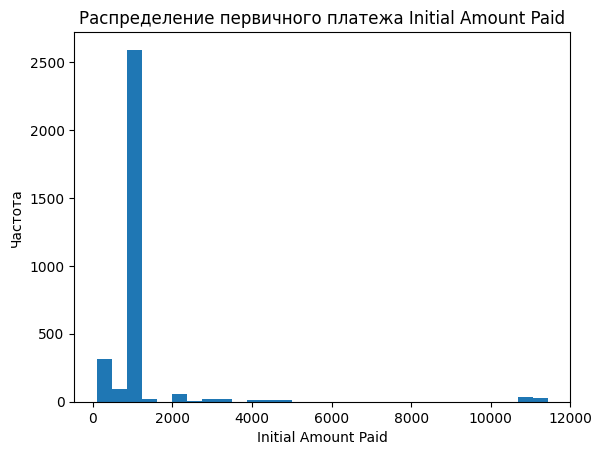

In [ ]:
plt.hist(deals['Initial Amount Paid'], bins=30)
plt.xlabel('Initial Amount Paid')
plt.ylabel('Частота')
plt.title('Распределение первичного платежа Initial Amount Paid')
plt.show()


было около 2700 сделок, где начальная сумма платежа находилась в диапазоне 1500

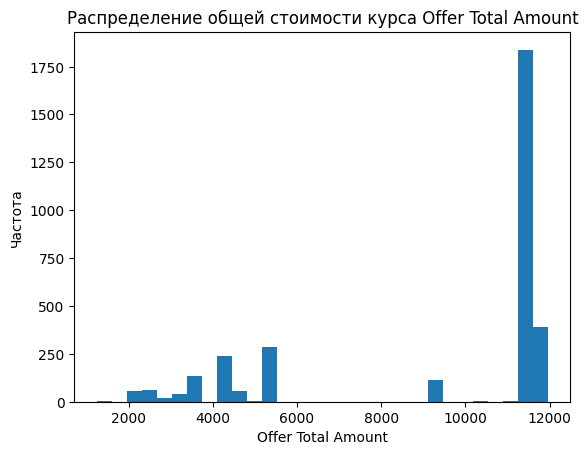

In [ ]:
plt.hist(deals['Offer Total Amount'], bins=30)
plt.xlabel('Offer Total Amount')
plt.ylabel('Частота')
plt.title('Распределение общей стоимости курса Offer Total Amount')
plt.show()


Более 1750 сделок составили стоимость 11000

In [ ]:
deals.describe()


,Id,Closing Date,SLA,Created Time,Course duration,Months of study_deals,Initial Amount Paid,Offer Total Amount,Contact Name
count,13970.0,13970,13970.000000,13970,13970.000000,13970.000000,3211.000000,3246.000000,13970.0
mean,5805028000030828544.0,2024-05-10 20:28:35.218325248,26.918611,2024-01-30 14:12:27.315676416,2.502935,1.233725,1186.743694,9408.240604,5804612464739649536.0
min,5805028000000932864.0,2023-07-06 00:00:00,0.002222,2023-07-03 00:00:00,0.000000,0.000000,100.000000,1248.000000,0.0
25%,5805028000017367040.0,2023-12-27 06:00:00,1.738681,2023-11-16 00:00:00,0.000000,0.000000,1000.000000,5200.000000,5805028000015579136.0
50%,5805028000031772672.0,2024-04-16 00:00:00,5.526111,2024-02-14 00:00:00,0.000000,0.000000,1000.000000,11440.000000,5805028000029419520.0
75%,5805028000045035520.0,2025-01-01 00:00:00,14.098819,2024-04-19 00:00:00,0.000000,0.000000,1000.000000,11440.000000,5805028000043808768.0
max,5805028000056889344.0,2025-01-01 00:00:00,7474.573333,2024-06-21 00:00:00,11.000000,11.000000,11440.000000,11960.000000,5805028000056892416.0
std,16018839.452328,NaN,196.493972,NaN,4.483394,2.398853,1451.000293,3327.649263,49114091592153968.0


In [ ]:
deals.describe().T

,count,mean,min,25%,50%,75%,max,std
Id,13970.0,5805028000030828544.0,5805028000000932864.0,5805028000017367040.0,5805028000031772672.0,5805028000045035520.0,5805028000056889344.0,16018839.452328
Closing Date,13970,2024-05-10 20:28:35.218325248,2023-07-06 00:00:00,2023-12-27 06:00:00,2024-04-16 00:00:00,2025-01-01 00:00:00,2025-01-01 00:00:00,NaN
SLA,13970.0,26.918611,0.002222,1.738681,5.526111,14.098819,7474.573333,196.493972
Created Time,13970,2024-01-30 14:12:27.315676416,2023-07-03 00:00:00,2023-11-16 00:00:00,2024-02-14 00:00:00,2024-04-19 00:00:00,2024-06-21 00:00:00,NaN
Course duration,13970.0,2.502935,0.0,0.0,0.0,0.0,11.0,4.483394
Months of study_deals,13970.0,1.233725,0.0,0.0,0.0,0.0,11.0,2.398853
Initial Amount Paid,3211.0,1186.743694,100.0,1000.0,1000.0,1000.0,11440.0,1451.000293
Offer Total Amount,3246.0,9408.240604,1248.0,5200.0,11440.0,11440.0,11960.0,3327.649263
Contact Name,13970.0,5804612464739649536.0,0.0,5805028000015579136.0,5805028000029419520.0,5805028000043808768.0,5805028000056892416.0,49114091592153968.0


**CLOSING DATE В 2022 ГОДУ - ОШИБКА ВВОДА ДАННЫХ. ЗАМЕНЮ НА 2023, учитывая, что Created Time 3 октября 2023 и сделка потеряна**

In [ ]:
deals.loc[deals['Closing Date'] == '2022-10-11', 'Closing Date'] = '2023-10-11'

In [ ]:
SD_Initial = deals['Initial Amount Paid'].max() - deals['Initial Amount Paid'].min()
SD_Offer = deals['Offer Total Amount'].max() - deals['Offer Total Amount'].min()
print(SD_Initial, SD_Offer)

11340.0 10712.0


# **ОДНОМЕРНЫЙ АНАЛИЗ **

In [ ]:
cat_cols = deals.select_dtypes(include=['category']).columns.tolist()
num_cols = deals.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Stage', 'Lost Reason', 'Product', 'Education Type', 'Level of Deutsch', 'Quality2']
Numerical Variables:
['Id', 'SLA', 'Course duration', 'Months of study_deals', 'Initial Amount Paid', 'Offer Total Amount', 'Contact Name']


Id


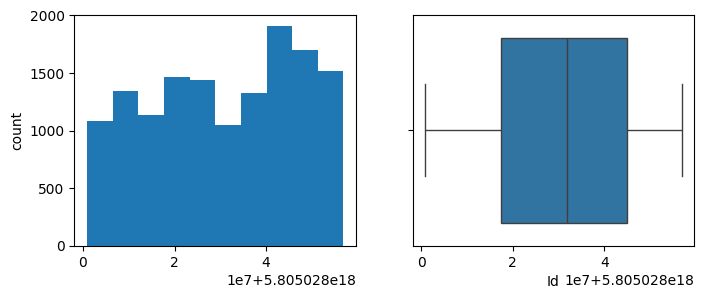

SLA


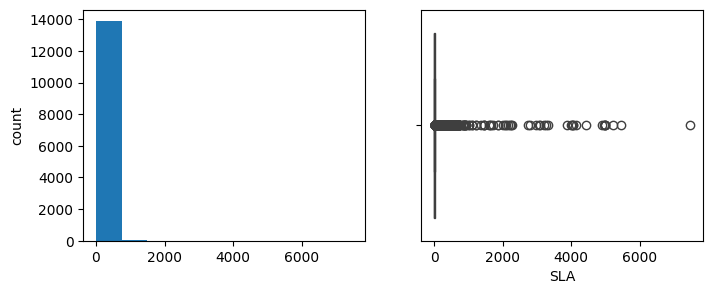

Course duration


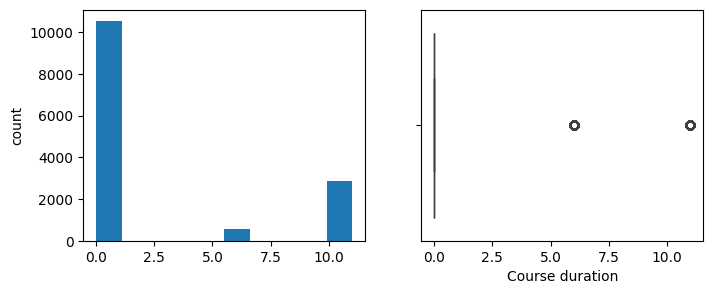

Months of study_deals


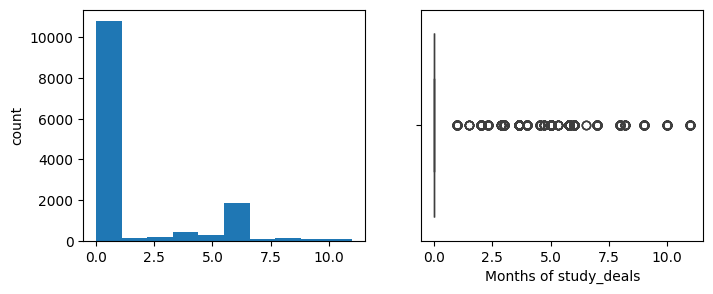

Initial Amount Paid


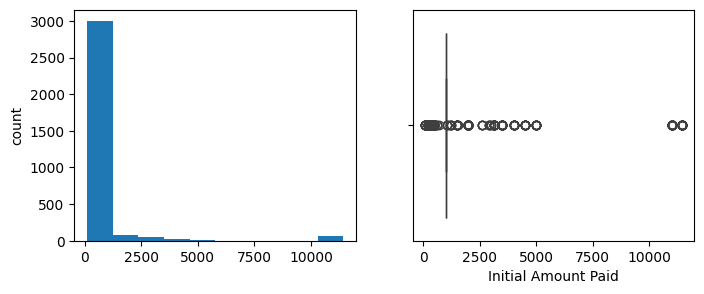

Offer Total Amount


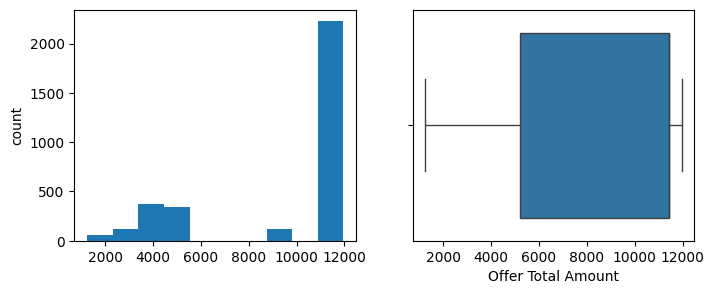

Contact Name


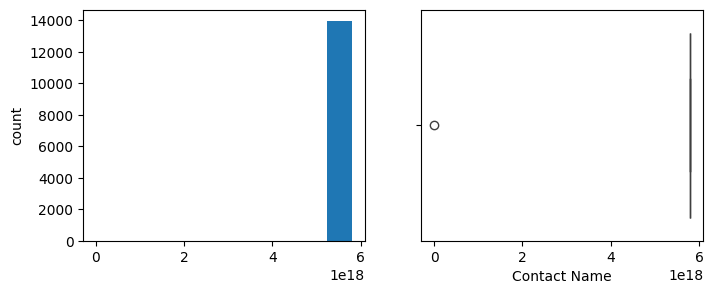

In [ ]:
for col in num_cols:
    print(col)
    plt.figure(figsize = (8, 3))
    plt.subplot(1, 2, 1)
    deals[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=deals[col])
    plt.show()

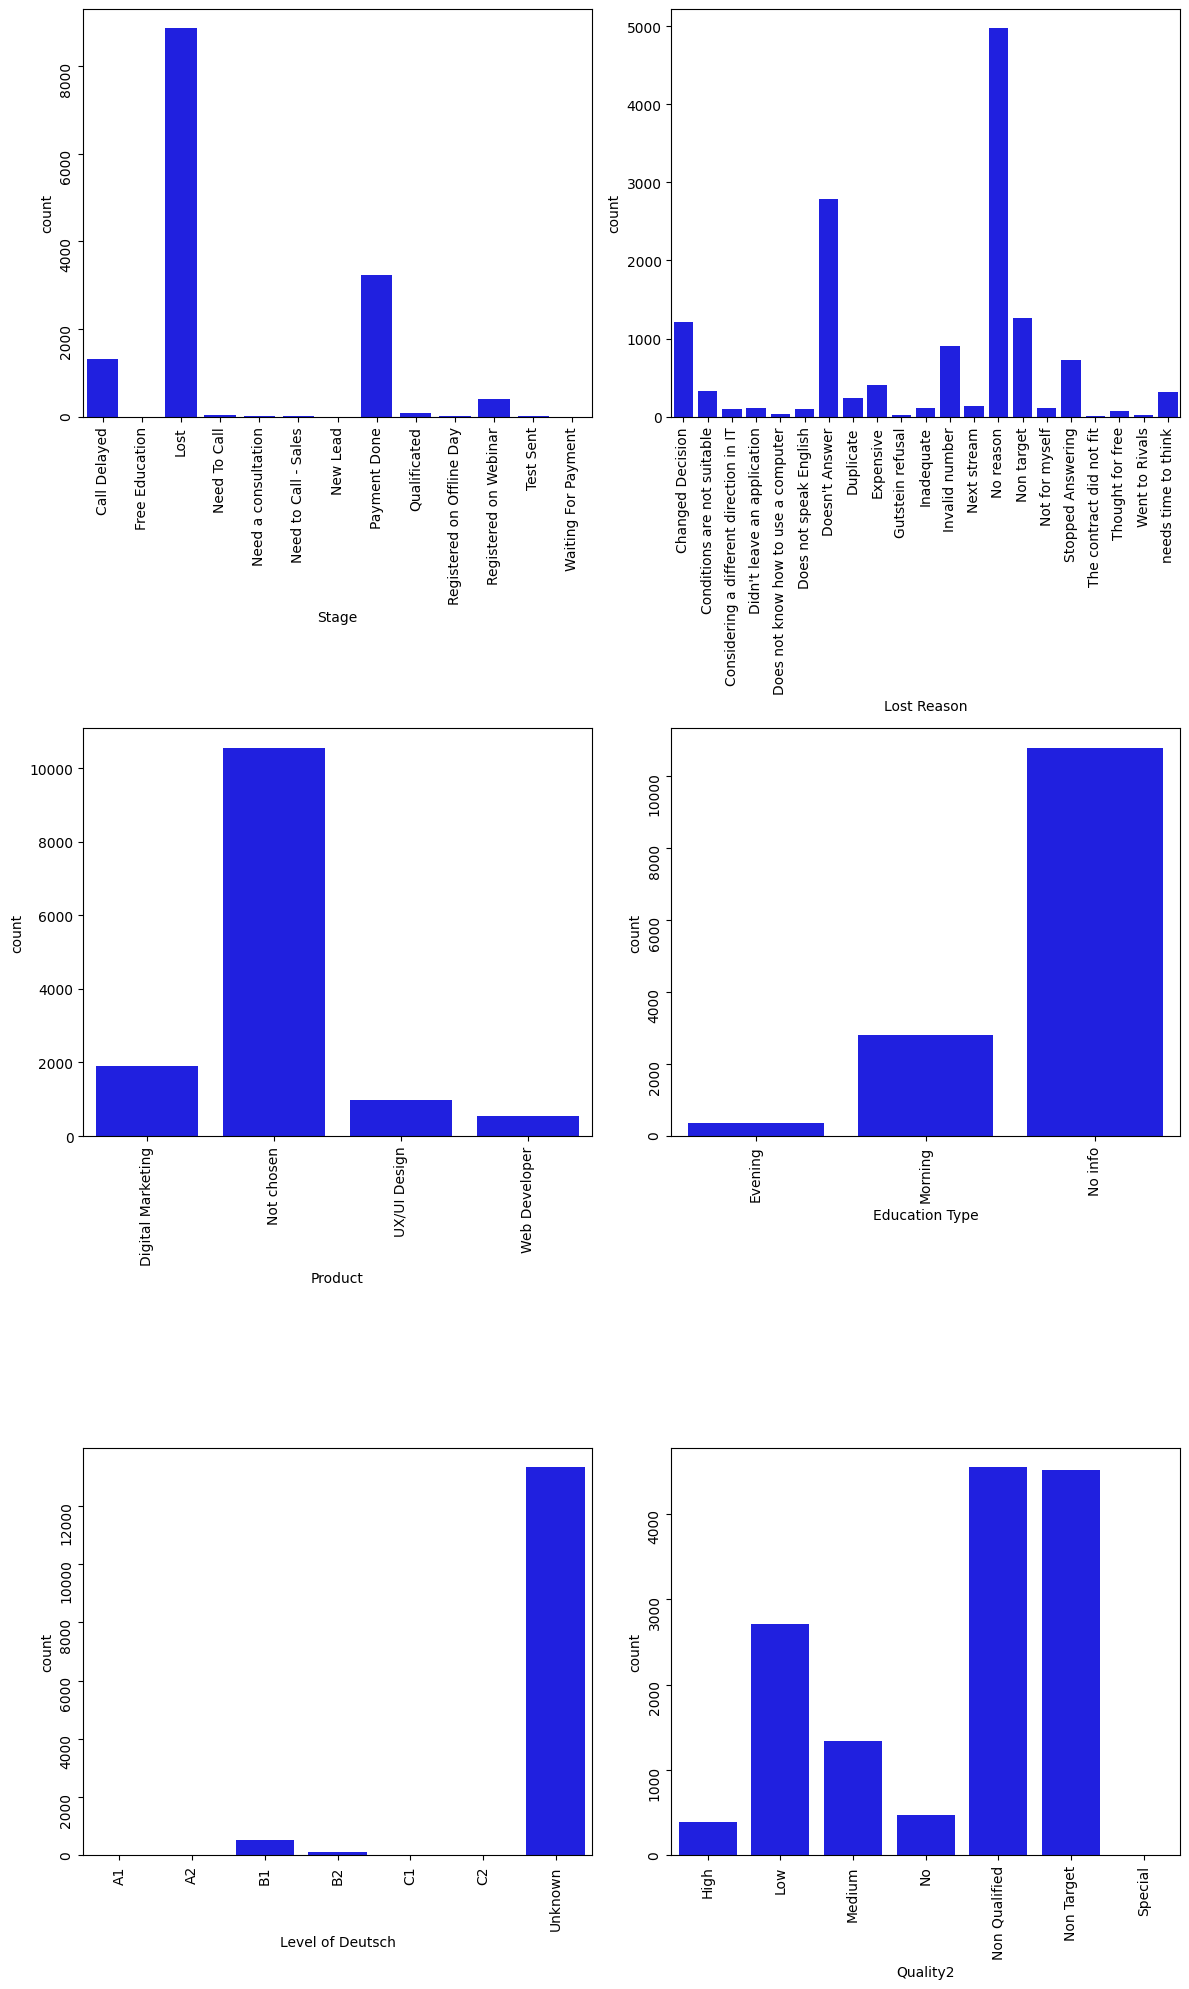

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 20))

for i in range(len(cat_cols)):
    row = i // 2  # Индекс строки
    col = i % 2   # Индекс столбца
    sns.countplot(ax=axes[row, col], x=cat_cols[i], data=deals, color='blue')
    axes[row, col].tick_params(axis='x', rotation=90)
    axes[row, col].tick_params(axis='y', rotation=0)

# Настройка поворота меток для осей
axes[0][0].tick_params(labelrotation=90)
axes[1][1].tick_params(labelrotation=90)
axes[2][0].tick_params(labelrotation=90)
axes[2][1].tick_params(labelrotation=90)
# axes[3][0].tick_params(labelrotation=90)

# Отображение графиков
plt.tight_layout()
plt.show()

# **ДВУМЕРНЫЙ АНАЛИЗ**

<Figure size 1300x1700 with 0 Axes>

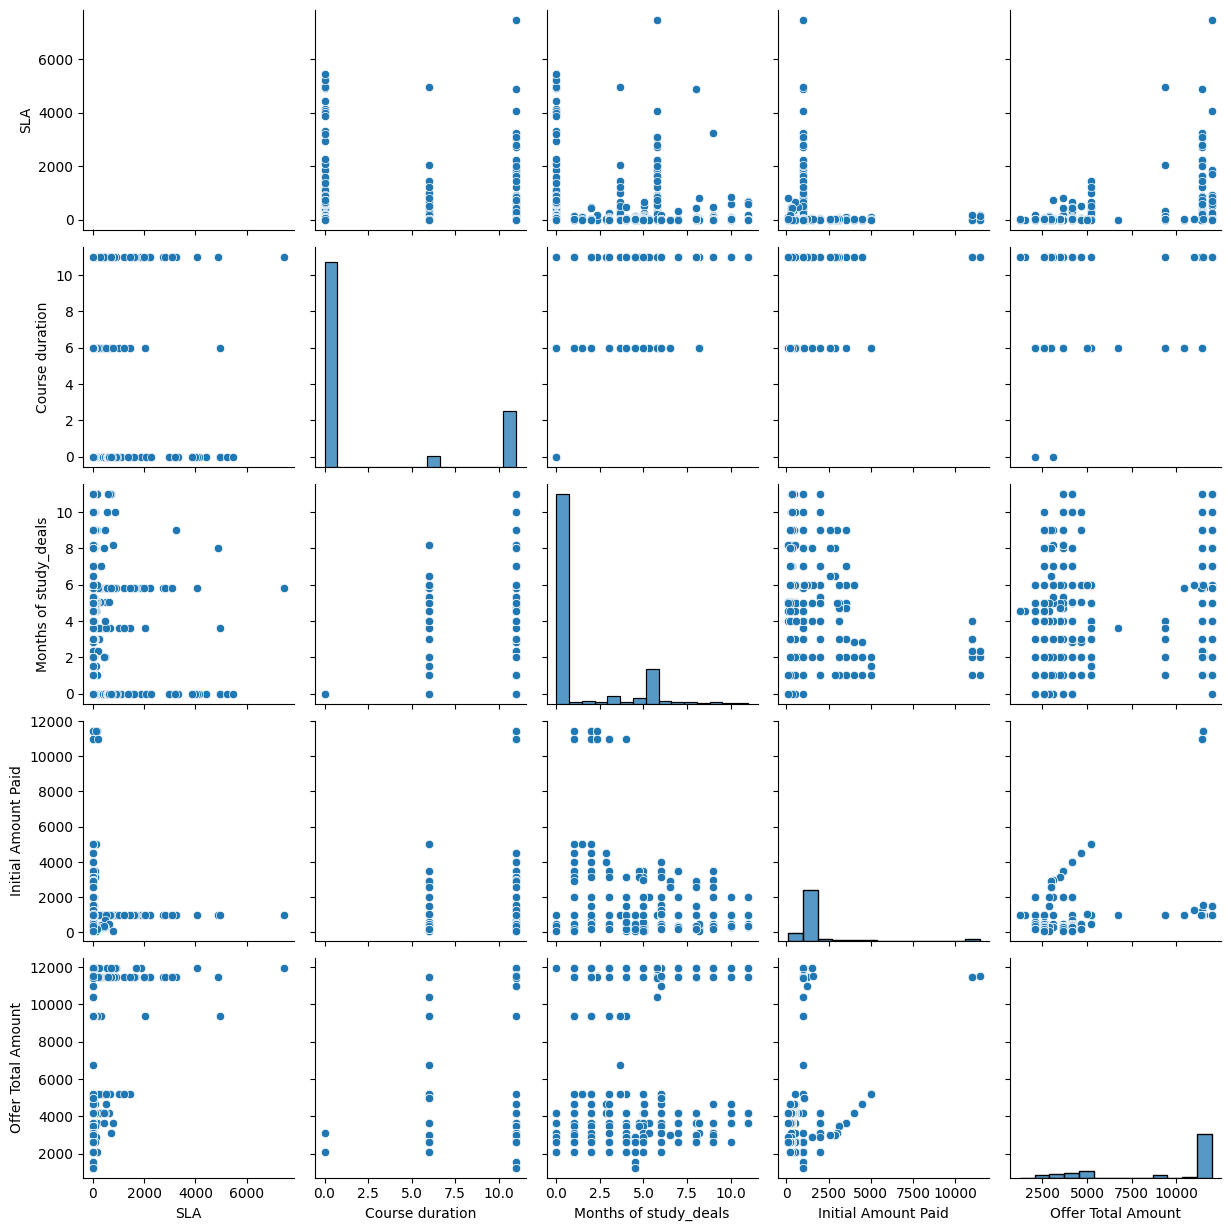

In [ ]:
plt.figure(figsize=(13,17))

sns.pairplot(deals[['SLA', 'Course duration', 'Months of study_deals', 'Initial Amount Paid', 'Offer Total Amount']])
plt.show()

# **МНОГОМЕРНЫЙ АНАЛИЗ**

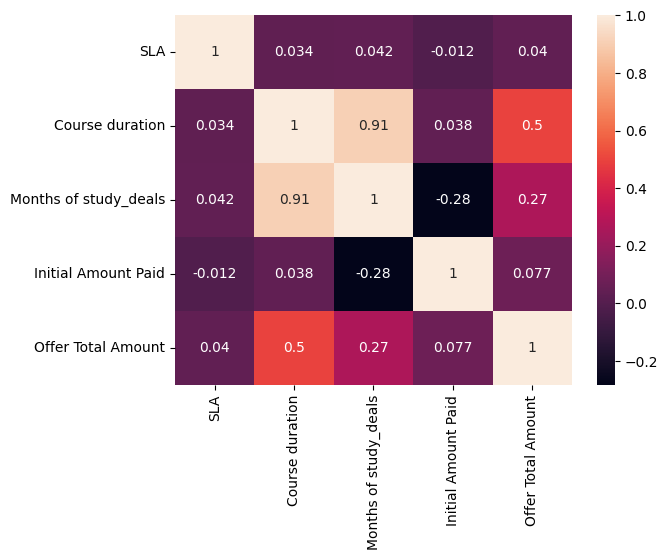

In [ ]:
plt.figure()
sns.heatmap(deals[['SLA', 'Course duration', 'Months of study_deals', 'Initial Amount Paid', 'Offer Total Amount']].corr(), annot = True)
plt.show()

In [ ]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13970 entries, 0 to 13969
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     13970 non-null  Int64         
 1   Deal Owner Name        13970 non-null  object        
 2   Closing Date           13970 non-null  datetime64[ns]
 3   Stage                  13970 non-null  category      
 4   Lost Reason            13970 non-null  category      
 5   Campaign               13970 non-null  object        
 6   SLA                    13970 non-null  float64       
 7   Source                 13970 non-null  object        
 8   Payment Type           13970 non-null  object        
 9   Product                13970 non-null  category      
 10  Education Type         13970 non-null  category      
 11  Created Time           13970 non-null  datetime64[ns]
 12  Course duration        13970 non-null  int64         
 13  M

In [ ]:
column_types = {}


for column in deals.columns:
    column_types[column] = str(deals[column].dtype)
for column in deals.select_dtypes(include='category').columns:
    deals[column] = deals[column].astype(str)
    column_types[column] = 'str'

for column in deals.select_dtypes(include='Int64').columns:
    deals[column] = deals[column].astype(str)
    column_types[column] = 'str'

deals.to_excel('Updated_Deals.xlsx', index=False)

for column, dtype in column_types.items():
    if dtype == 'category':
        deals[column] = deals[column].astype('category')
    elif dtype == 'Int64':
        deals[column] = deals[column].astype('Int64')

In [ ]:
deals_updated = pd.read_excel('Updated_Deals.xlsx')
deals_updated

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Campaign,SLA,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study_deals,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
0,5805028000007843060,Ulysses Adams,2025-01-01,Payment Done,No reason,04.07.23recentlymoved_DE,0.016667,Facebook Ads,Recurring Payments,Digital Marketing,Morning,2023-09-15,11,6.0,1500.0,11960.0,5805028000007854069,Unknown,Unknown,Medium
1,5805028000007754120,Cara Iverson,2023-11-12,Payment Done,No reason,work_DE,13.890278,Telegram posts,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500.0,11960.0,5805028000007742068,Unknown,Unknown,Low
2,5805028000007744074,Jane Smith,2023-10-18,Payment Done,No reason,work_DE,0.543333,Telegram posts,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500.0,11960.0,5805028000007761132,Unknown,Unknown,Low
3,5805028000007647107,Jane Smith,2023-09-14,Payment Done,No reason,youtube_shorts_DE,5.526111,Youtube Ads,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500.0,11960.0,5805028000007649089,Unknown,Unknown,Medium
4,5805028000007623014,Jane Smith,2023-09-14,Payment Done,No reason,youtube_shorts_DE,2.800833,Youtube Ads,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500.0,11960.0,5805028000007595085,Unknown,Unknown,Non Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13965,5805028000001037002,Diana Evans,2023-09-07,Lost,Changed Decision,performancemax_digitalmarkt_ru_DE,23.157778,Google Ads,No Payments,Not chosen,No info,2023-07-05,0,0.0,NaN,NaN,5805028000001023002,Unknown,Unknown,High
13966,5805028000000933086,Ian Miller,2023-09-21,Lost,Expensive,02.07.23wide_DE,37.870000,Facebook Ads,No Payments,Not chosen,No info,2023-07-04,0,0.0,NaN,NaN,5805028000000964068,Unknown,Unknown,Low
13967,5805028000000963032,Ian Miller,2023-09-25,Lost,Stopped Answering,02.07.23wide_DE,47.049167,Facebook Ads,No Payments,Not chosen,No info,2023-07-04,0,0.0,NaN,NaN,5805028000000942003,Unknown,Unknown,High
13968,5805028000000935025,Kevin Parker,2023-07-06,Lost,Doesn't Answer,02.07.23wide_DE,5.526111,Facebook Ads,No Payments,Not chosen,No info,2023-07-04,0,0.0,NaN,NaN,5805028000000983028,Unknown,Unknown,Non Qualified


In [ ]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=deals_updated)